# Setting up global imports, font and color

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append("../")

import os
from Utils.plot_functions import get_color_gradient, get_full_color_gradient
from Utils.util_functions import get_events
from Utils.Get_adni import get_merge


figure_size = (20, 8)

In [30]:
from matplotlib.font_manager import FontProperties

font_path = '../Old_Standard_TT'
font_path_regular = f'{font_path}/OldStandardTT-Regular.ttf'
font_path_bold = f'{font_path}/OldStandardTT-Bold.ttf'
font_path_italic = f'{font_path}/OldStandardTT-Italic.ttf'

# Specify the direct path to your font file
# font_path_regular = '/home/diego/.conda/envs/diego/fonts/OldStandardTT-Regular.ttf'
# font_path_bold = '/home/diego/.conda/envs/diego/fonts/OldStandardTT-Bold.ttf'
# font_path_italic = '/home/diego/.conda/envs/diego/fonts/OldStandardTT-Italic.ttf'
# Create a FontProperties object with the full path to the font file
prop_regular = FontProperties(fname=font_path_regular)
prop_bold = FontProperties(fname=font_path_bold)
prop_italic = FontProperties(fname=font_path_italic)

my_colors = ['#B0DAFF', '#FFB085']

In [31]:
print(get_color_gradient(my_colors[0], my_colors[1], 6))

['#b0daff', '#c0d2e7', '#d0c9ce', '#dfc1b6', '#efb89d', '#ffb085']


# Importing the dataset and splitting it into the individual cohorts

In [32]:
#import csv file with pandas
df = pd.read_csv('../Datasets/ADNI/ADNIMERGE_02Apr2024.csv')
baseline_columns = ['CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'ADASQ4_bl', 'MMSE_bl', 'RAVLT_immediate_bl', 
                    'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'LDELTOTAL_BL',
                    'DIGITSCOR_bl', 'TRABSCOR_bl', 'FAQ_bl', 'mPACCdigit_bl',
                    'mPACCtrailsB_bl', 'Ventricles_bl', 'Hippocampus_bl', 
                    'WholeBrain_bl', 'Entorhinal_bl', 'Fusiform_bl', 'MidTemp_bl', 'ICV_bl',
                    'MOCA_bl', 'EcogPtMem_bl', 'EcogPtLang_bl', 'EcogPtVisspat_bl',
                    'EcogPtPlan_bl', 'EcogPtOrgan_bl', 'EcogPtDivatt_bl', 'EcogPtTotal_bl',
                    'EcogSPMem_bl', 'EcogSPLang_bl', 'EcogSPVisspat_bl', 'EcogSPPlan_bl',
                    'EcogSPOrgan_bl', 'EcogSPDivatt_bl', 'EcogSPTotal_bl', 'FDG_bl', 'PIB_bl','AV45_bl', 'FBB_bl',
                    'EXAMDATE_bl', 'FLDSTRENG_bl', 'FSVERSION_bl', 'IMAGEUID_bl', 'ABETA_bl', 'TAU_bl', 'PTAU_bl', 
                    'DX_bl']
print(len(baseline_columns))
df = df.drop(columns=baseline_columns, axis=1)
df['DX'] = df['DX'].replace({'Dementia': 'AD'})

#Split into cohorts
ADNI1 = df[(df['ORIGPROT'] == 'ADNI1') & (df['COLPROT'] == 'ADNI1')]
ADNI2 = df[(df['ORIGPROT'] == 'ADNI2') & (df['COLPROT'] == 'ADNI2')]
ADNIGO = df[(df['ORIGPROT'] == 'ADNIGO') & (df['COLPROT'] == 'ADNIGO')]
ADNI3 = df[(df['ORIGPROT'] == 'ADNI3') & (df['COLPROT'] == 'ADNI3')]
adni_list = [ADNI1, ADNI2, ADNIGO, ADNI3]

display(df)
print(f"Unique subjects: {df['RID'].nunique()}")

49


C:\Users\dbior\AppData\Local\Temp\ipykernel_30484\1948113512.py:2: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Datasets/ADNI/ADNIMERGE_02Apr2024.csv')


,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,AGE,PTGENDER,PTEDUCAT,...,MidTemp,ICV,DX,mPACCdigit,mPACCtrailsB,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,74.3,Male,16,...,27936.0,1984660.0,CN,-4.31028,-4.11443,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,81.3,Male,18,...,18422.0,1920690.0,AD,-16.24490,-15.82990,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,81.3,Male,18,...,16972.0,1906430.0,AD,-14.76900,-13.13950,0.498289,5.96721,6,6,2023-07-07 04:59:40.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,81.3,Male,18,...,17330.0,1903820.0,AD,-20.96910,-19.77900,0.999316,11.96720,12,12,2023-07-07 04:59:40.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-09-12,81.3,Male,18,...,16398.0,1903420.0,AD,-19.71360,-19.89420,1.998630,23.93440,24,24,2023-07-07 04:59:40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16416,4349,ADNI3,ADNI2,018_S_4349,18,m138,2023-03-30,71.4,Female,16,...,NaN,NaN,NaN,NaN,NaN,11.351100,135.93400,138,138,2023-08-22 04:58:56.0
16417,6801,ADNI3,ADNI3,041_S_6801,41,m42,2023-06-30,61.0,Female,12,...,NaN,NaN,NaN,NaN,NaN,3.701570,44.32790,42,42,2023-08-25 05:00:03.0
16418,5097,ADNI3,ADNI2,041_S_5097,41,m126,2023-08-16,67.5,Male,16,...,NaN,NaN,NaN,NaN,NaN,10.371000,124.19700,126,126,2023-08-26 05:00:28.0
16419,6515,ADNI3,ADNI3,007_S_6515,7,m60,2023-08-24,89.9,Female,15,...,NaN,NaN,NaN,NaN,NaN,5.004790,59.93440,60,60,2023-08-29 04:58:51.0


Unique subjects: 2430


In [5]:
# baseline_df = df[df['M'] == 0]
# baseline_df = baseline_df[baseline_df['DX'] != 'AD']
# print(baseline_df['DX'].value_counts().sum())
tmp = df.dropna(subset=['DX'])
tmp = tmp[tmp['RID'].map(tmp['RID'].value_counts()) > 1]
print(tmp['RID'].nunique())
tmp = tmp[(tmp['M'] == 0) & (tmp['DX'] != 2)]
print(tmp['DX'].value_counts()) 
print(tmp['RID'].nunique()) 
# tmp = tmp[tmp['RID'].isin(counts)]
print(f"Shape: {tmp.shape}")
initial_rids = set(tmp['RID'].unique())

# Generate tmp2 using the get_events function
tmp2 = get_events(df, fill=True)
tmp2.shape

2086
MCI    987
CN     736
AD     363
Name: DX, dtype: int64
2086
Shape: (2086, 67)


(2086, 68)

# Exploring missing entries

In [6]:
total_missing_entries = df.isnull().sum().sum()/df.size
total_missing_entries

0.3581753251888054

In [7]:
missing_percent = df.isnull().mean() * 100

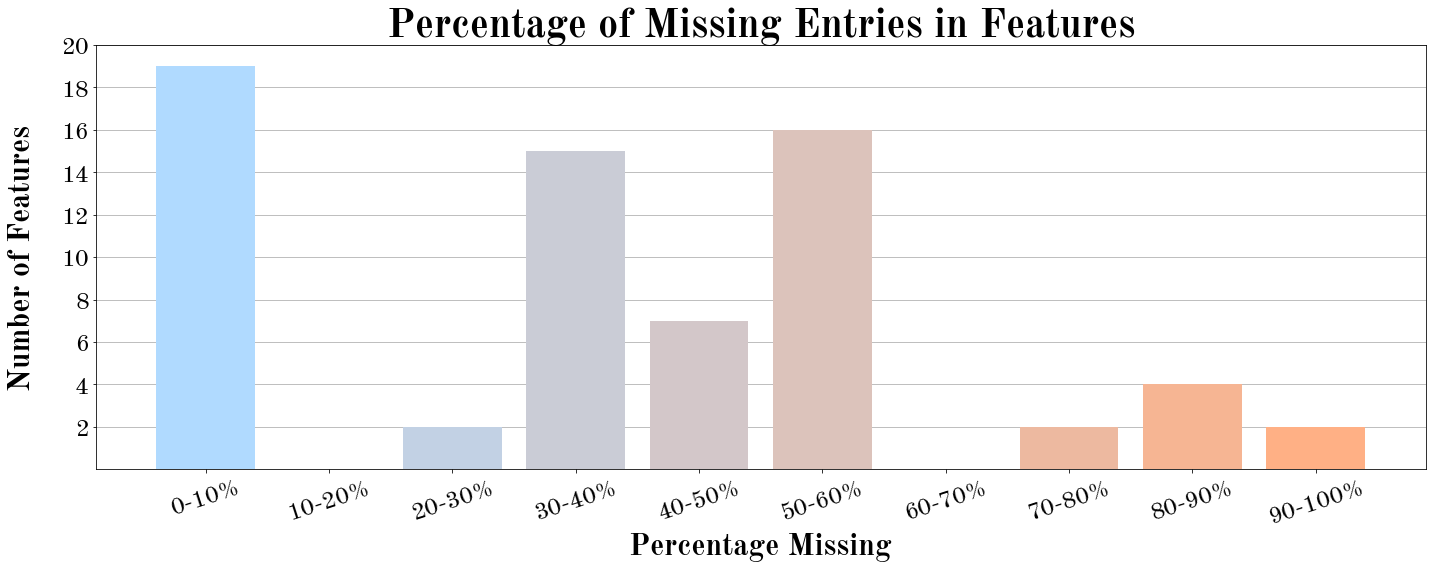

In [8]:
# Calculate the percentage of missing data for each feature

# Define bins for percentage ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

# Categorize the percentages into bins
categorized = pd.cut(missing_percent, bins=bins, labels=labels, include_lowest=True)

# Count the number of features in each bin
counts = categorized.value_counts().sort_index()

plt.figure(figsize=figure_size)

plt.bar(counts.index, counts.values, color=get_color_gradient(my_colors[0], my_colors[1], len(counts.index)), zorder=3)
plt.title('Percentage of Missing Entries in Features', fontproperties=prop_bold, fontsize=40, )# pad=20)
plt.xlabel('Percentage Missing', fontsize=30, fontproperties=prop_bold)
plt.ylabel('Number of Features', fontsize=30, fontproperties=prop_bold, labelpad=25)
plt.xticks(rotation=18, fontsize=24,  fontproperties=prop_regular)
plt.yticks(np.arange(start=2, stop=21, step=2), fontsize=24, fontproperties=prop_regular)
plt.grid(axis='y')
plt.xticks(np.arange(len(labels)), labels)
plt.tight_layout()
plt.savefig('figures/ADNI_feature_missing_values.pdf')
plt.show()


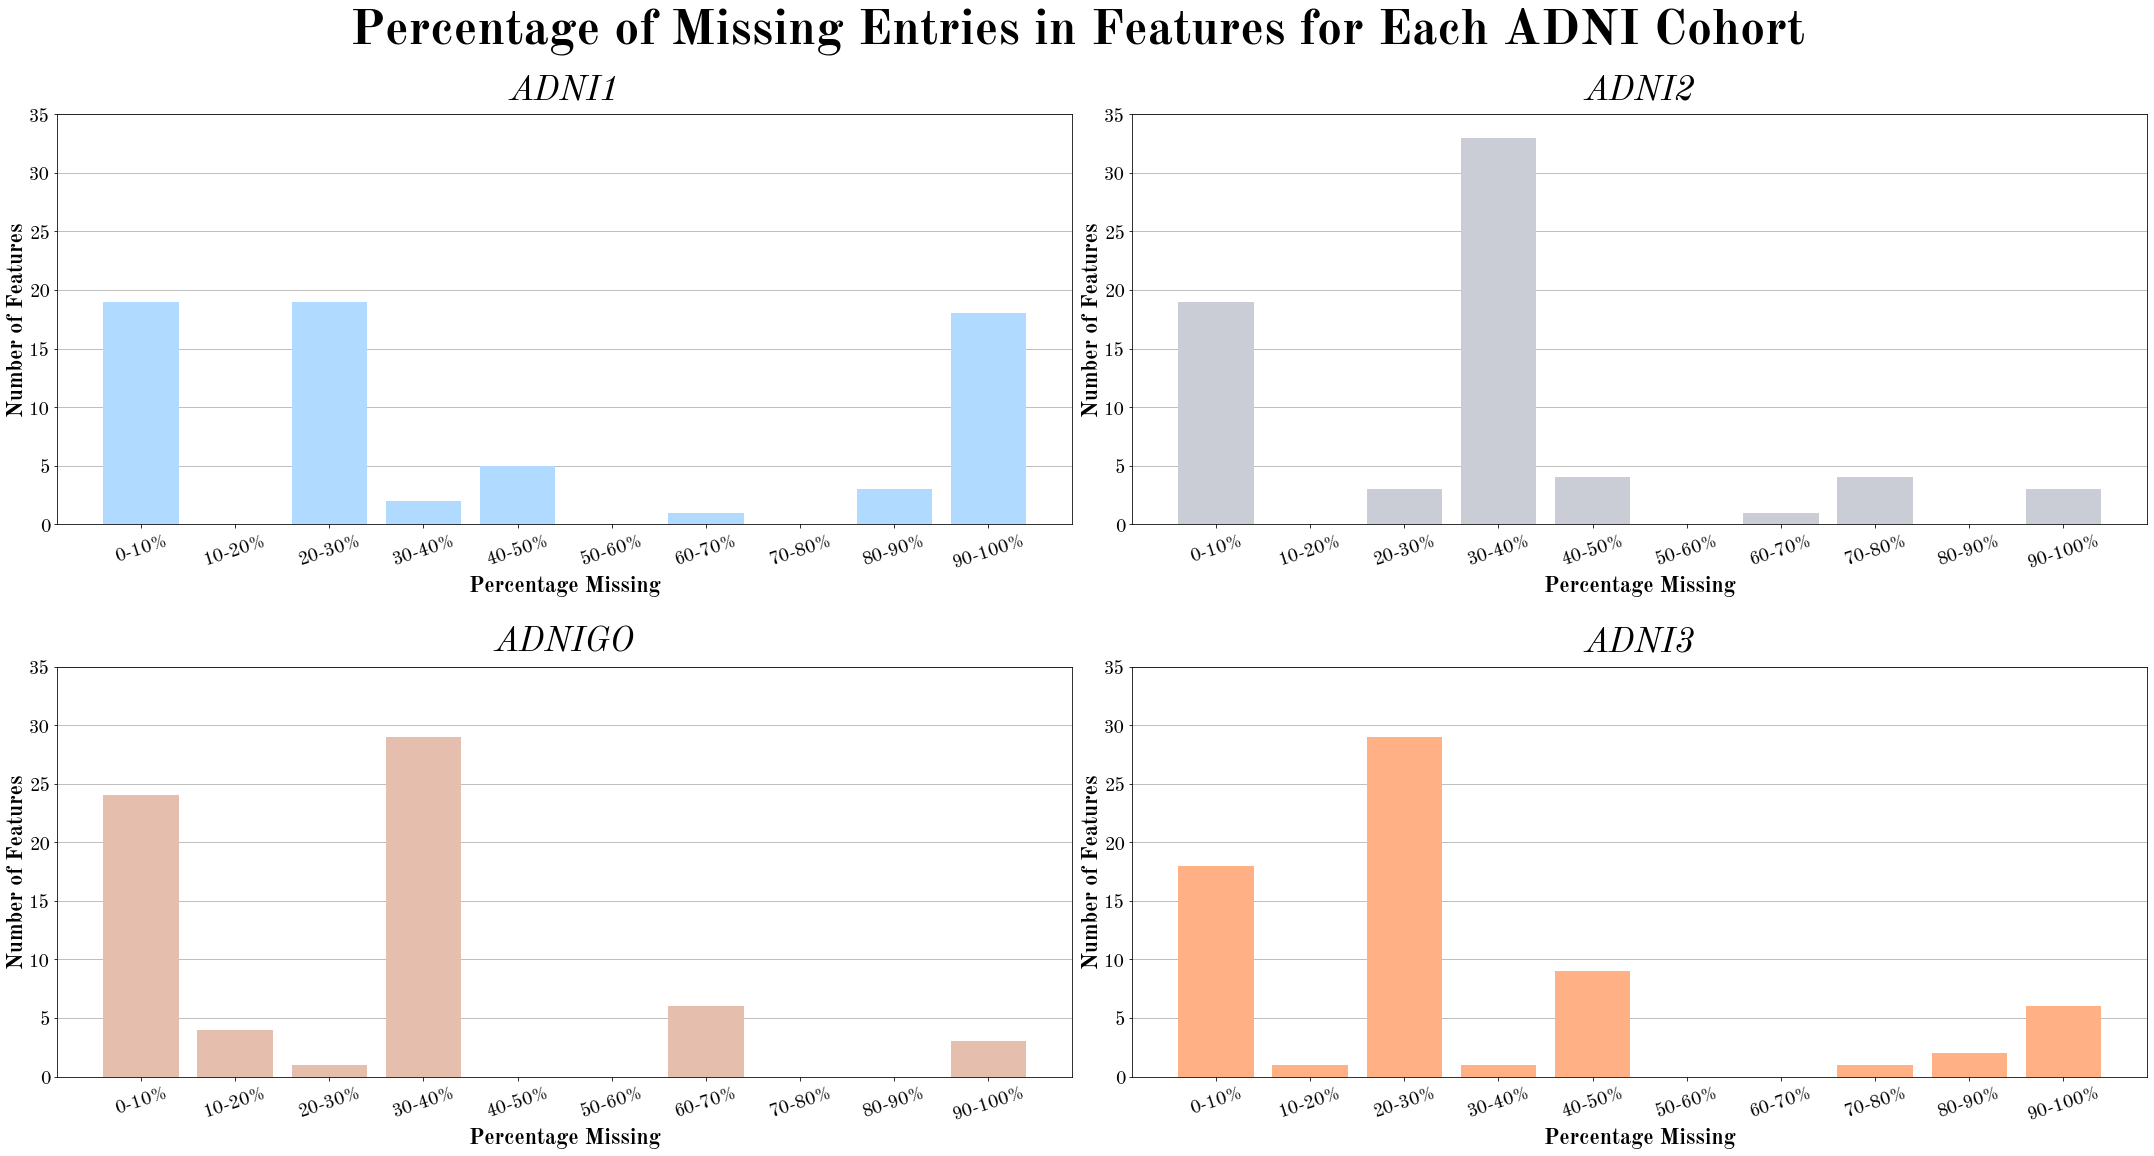

In [9]:
title = ['ADNI1', 'ADNI2', 'ADNIGO', 'ADNI3']
colors_4_split = get_color_gradient(my_colors[0], my_colors[1], 4)

fig, axs = plt.subplots(2, 2, figsize=(30, 16))
axs = axs.flatten()  # Flatten the 2x2 array to easily loop over it
for i, study in enumerate(adni_list):
    missing_percent_individual = study.isnull().mean() * 100

    # Categorize the percentages into bins
    categorized = pd.cut(missing_percent_individual, bins=bins, labels=labels, include_lowest=True)

    # Count the number of features in each bin
    counts = categorized.value_counts().sort_index()

    # Plot on the ith subplot
    axs[i].bar(counts.index, counts.values, zorder=3, color=colors_4_split[i])
    axs[i].set_title(f"{title[i]}", fontsize=34, fontproperties=prop_italic, pad=15)  # Use the titles list to set subplot titles
    axs[i].set_xlabel('Percentage Missing', fontsize=22, fontproperties=prop_bold)
    axs[i].set_ylabel('Number of Features', fontsize=22, fontproperties=prop_bold, labelpad=1)
    
    for label in axs[i].get_xticklabels():
        label.set_fontproperties(prop_regular)
    for label in axs[i].get_yticklabels():
        label.set_fontproperties(prop_regular)
    axs[i].set_yticks(np.arange(start=0, stop=40, step=5))
    axs[i].tick_params(axis='x', rotation=18, labelsize=18)#, fontproperties=prop_regular)  # Rotate the x-axis labels for better readability
    axs[i].tick_params(axis='both', labelsize=18)#, fontproperties=prop_regular)
    axs[i].grid(axis='y')
#Percentage of Missing Entries in Features
fig.suptitle("Percentage of Missing Entries in Features for Each ADNI Cohort", fontsize=50, fontproperties=prop_bold, y=1)
plt.tight_layout(pad=1.0, h_pad=3, w_pad=1.0)  # Adjust the layout to make sure everything fits without overlap
plt.savefig("figures/ADNI_missing_values_by_study.pdf")
plt.show()

In [10]:
#List all the features with over 60 percent of data missing:
missing_cutoff = 70
features_over_cutoff_percent_missing = missing_percent[missing_percent > missing_cutoff]
# features_missing_list = list(features_over_cutoff_percent_missing.items())
print(features_over_cutoff_percent_missing)

# print(f"Features with over {missing_cutoff}% missing values and their percentages:")
# # features_missing_list# 
# for feature, percent_missing in features_missing_list:
#     print(f"{feature}: {percent_missing}%")

FDG          77.510505
PIB          98.641983
AV45         81.243530
FBB          96.875952
ABETA        85.567261
TAU          85.567261
PTAU         85.573351
DIGITSCOR    76.858900
dtype: float64


In [11]:
missing_features = {}

# Loop over each cohort DataFrame
for i, study in enumerate(adni_list):
    # Calculate the percentage of missing data for each column
    missing_percentage = study.isnull().mean() * 100
    # Find columns with more than 99% missing data
    columns_to_drop = missing_percentage[missing_percentage > 99].index

    # Update the dictionary with the missing features and their respective cohorts
    for column in columns_to_drop:
        if column in missing_features:
            missing_features[column].append(title[i])
        else:
            missing_features[column] = [title[i]]

# Optionally, convert the dictionary to a DataFrame for better visualization
import pandas as pd
missing_features_df = pd.DataFrame(list(missing_features.items()), columns=['Feature', 'Missing in Cohorts'])

# Display the DataFrame
print(missing_features_df)
for column in missing_features_df:
    print(column)

          Feature      Missing in Cohorts
0            AV45                 [ADNI1]
1             FBB  [ADNI1, ADNI2, ADNIGO]
2            MOCA                 [ADNI1]
3       EcogPtMem                 [ADNI1]
4      EcogPtLang                 [ADNI1]
5   EcogPtVisspat                 [ADNI1]
6      EcogPtPlan                 [ADNI1]
7     EcogPtOrgan                 [ADNI1]
8    EcogPtDivatt                 [ADNI1]
9     EcogPtTotal                 [ADNI1]
10      EcogSPMem                 [ADNI1]
11     EcogSPLang                 [ADNI1]
12  EcogSPVisspat                 [ADNI1]
13     EcogSPPlan                 [ADNI1]
14    EcogSPOrgan                 [ADNI1]
15   EcogSPDivatt                 [ADNI1]
16    EcogSPTotal                 [ADNI1]
17            PIB  [ADNI2, ADNIGO, ADNI3]
18      DIGITSCOR  [ADNI2, ADNIGO, ADNI3]
19          ABETA                 [ADNI3]
20            TAU                 [ADNI3]
21           PTAU                 [ADNI3]
22      FLDSTRENG                 

# Some checkup on the individual cohorts and how many appeared in multiple

### How much overlap is there between cohorts

In [12]:
ADNI1_pure = df[(df['ORIGPROT'] == 'ADNI1') & (df['COLPROT'] == 'ADNI1')]
ADNI2_pure = df[(df['ORIGPROT'] == 'ADNI2') & (df['COLPROT'] == 'ADNI2')]
ADNIGO_pure = df[(df['ORIGPROT'] == 'ADNIGO') & (df['COLPROT'] == 'ADNIGO')]
ADNI3_pure = df[(df['ORIGPROT'] == 'ADNI3') & (df['COLPROT'] == 'ADNI3')]
adni_list = [ADNI1_pure, ADNI2_pure, ADNIGO_pure, ADNI3_pure]

title = ['ADNI1', 'ADNI2', 'ADNIGO', 'ADNI3']

In [13]:
overlaps = df[df['ORIGPROT'] != df['COLPROT']]
print(f"Measurements that stems from overlaps: {len(overlaps)}")
print(f"Unique subjects in overlaps: {overlaps['RID'].nunique()}")

Measurements that stems from overlaps: 4264
Unique subjects in overlaps: 727


In [14]:
print(f"Pure ADNI (without overlaps):")
for i, study in enumerate(adni_list):
    print(f"{title[i]}:")
    print(study['PTID'].nunique(), "unique subjects")
    print(study.shape[0], "total measures")

print(f"All combined")
print(df.shape[0], "total measures")
print(df[df['VISCODE'] == 'bl'].shape[0], "baseline measures")

Pure ADNI (without overlaps):
ADNI1:
819 unique subjects
5013 total measures
ADNI2:
790 unique subjects
4718 total measures
ADNIGO:
131 unique subjects
382 total measures
ADNI3:
690 unique subjects
2044 total measures
All combined
16421 total measures
2430 baseline measures


In [15]:
ADNI_1_2 = df[(df['ORIGPROT'] == 'ADNI1') & (df['COLPROT'] == 'ADNI2')]
ADNI_1_GO = df[(df['ORIGPROT'] == 'ADNI1') & (df['COLPROT'] == 'ADNIGO')]
ADNI_GO_2 = df[(df['ORIGPROT'] == 'ADNIGO') & (df['COLPROT'] == 'ADNI2')]
ADNI_GO_3 = df[(df['ORIGPROT'] == 'ADNIGO') & (df['COLPROT'] == 'ADNI3')]
ADNI_2_3 = df[(df['ORIGPROT'] == 'ADNI2') & (df['COLPROT'] == 'ADNI3')]
ADNI_1_3 = df[(df['ORIGPROT'] == 'ADNI1') & (df['COLPROT'] == 'ADNI3')]

adni_list_overlap = [ADNI_1_2, 
                     ADNI_1_GO, 
                     ADNI_GO_2, 
                     ADNI_GO_3, 
                     ADNI_1_3, 
                     ADNI_2_3]

titles_overlap = ['ADNI1 to ADNI2',
                  'ADNI1 to ADNIGO',
                  'ADNIGO to ADNI2',
                  'ADNIGO to ADNI3',
                  'ADNI1 to ADNI3',
                  'ADNI2 to ADNI3',]

In [16]:
print(f"Overlap between cohorts:")
for i, study in enumerate(adni_list_overlap):
    print(f"{titles_overlap[i]}:")
    print(study['PTID'].nunique(), "unique subjects")
    print(study.shape[0], "total measures\n")

print(f"All combined")
print(df.shape[0], "total measures")
print(df[df['VISCODE'] == 'bl'].shape[0], "baseline measures")

Overlap between cohorts:
ADNI1 to ADNI2:
277 unique subjects
1516 total measures

ADNI1 to ADNIGO:
210 unique subjects
422 total measures

ADNIGO to ADNI2:
119 unique subjects
711 total measures

ADNIGO to ADNI3:
50 unique subjects
165 total measures

ADNI1 to ADNI3:
90 unique subjects
316 total measures

ADNI2 to ADNI3:
305 unique subjects
1134 total measures

All combined
16421 total measures
2430 baseline measures


### How many different cohorts have different users been in and which have been in 3 or more

In [17]:
user_cohorts = df.groupby('RID')['COLPROT'].nunique()

# Step 2: Count how many users are in each number of cohorts
cohort_counts = user_cohorts.value_counts().sort_index()

print("How many subjects have been in how many cohorts:")
print(cohort_counts)


users_in_three_or_more_cohorts = user_cohorts[user_cohorts >= 3]
print("\nUsers in 3 or more cohorts:")
print(users_in_three_or_more_cohorts)

How many subjects have been in how many cohorts:
1    1703
2     470
3     190
4      67
Name: COLPROT, dtype: int64

Users in 3 or more cohorts:
RID
2       4
8       3
21      4
23      3
31      4
       ..
2392    3
2394    3
2395    3
2396    3
2403    3
Name: COLPROT, Length: 257, dtype: int64


# Distribution plots

### Distribution of measurements at timepoints

In [18]:
#Plot distributions of how long subjects have been measured
#Sort string (e.g. m12 before m102)
def viscode_sort_key(code):
    if code == 'bl':
        return (0, 0)  # Baseline earliest
    elif code == 'm0':
        return (1, 0)  # Baseline follow-up
    elif code.startswith('m'):
        # Extract the number and use it for sorting
        month_number = int(code[1:])  # Remove 'm' and convert to integer
        return (2, month_number)  # Keep all 'mXX' codes in chronological order
    else:
        return (3, 0)  # In case there are unexpected codes
tmp = df[df['VISCODE'] != 'm0']
viscode_distribution = tmp['VISCODE'].value_counts()#.sort_index()
viscode_distribution = viscode_distribution.sort_index(key=lambda x: x.map(viscode_sort_key))
# viscode_distribution
viscode_count = tmp[tmp['M'] < 61]
print(len(viscode_count)/len(df))

0.8249802082698983


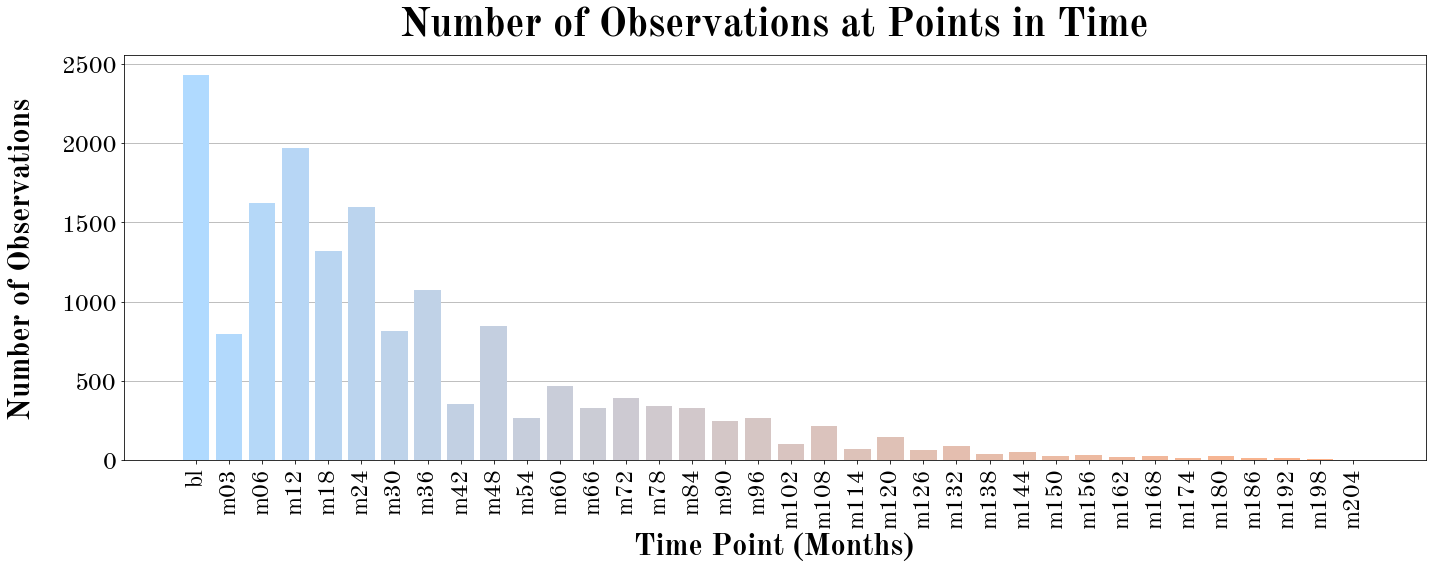

In [19]:
plt.figure(figsize=figure_size)
plt.bar(viscode_distribution.index, viscode_distribution.values, color=get_color_gradient(my_colors[0], my_colors[1], len(viscode_distribution.index)), zorder=3)
plt.title('Number of Observations at Points in Time', fontsize=40, fontproperties=prop_bold, pad=20)
plt.xlabel('Time Point (Months)', fontsize=30, fontproperties=prop_bold)
plt.ylabel('Number of Observations', fontsize=30, fontproperties=prop_bold, labelpad=25)
plt.xticks(rotation=90, fontsize=24,  fontproperties=prop_regular)
plt.yticks(fontsize=24,  fontproperties=prop_regular)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('figures/ADNI_measurements_timepoint.pdf')
plt.show()


### Plot of distribution of last measurement time

In [20]:
df_sorted = df.sort_values(by=['RID', 'Years_bl'])
df_sorted = df_sorted[df_sorted['VISCODE'] != 'm0']
last_viscode = df_sorted.groupby('RID')['VISCODE'].last()
viscode_counts = last_viscode.value_counts()

viscode_df = pd.DataFrame(last_viscode)
viscode_df['SortKey'] = viscode_df['VISCODE'].apply(viscode_sort_key)
viscode_df = viscode_df.sort_values(by='SortKey')

# Count the frequency of each sorted VISCODE
viscode_counts = viscode_df['VISCODE'].value_counts().sort_index(key=lambda x: x.map(viscode_sort_key))


last_observations = df.sort_values(['RID','M']).groupby(['RID']).last().reset_index()
last_observations_count = last_observations[last_observations['M'] < 37]
print(len(last_observations_count)/len(df['RID'].unique()))


0.5395061728395062


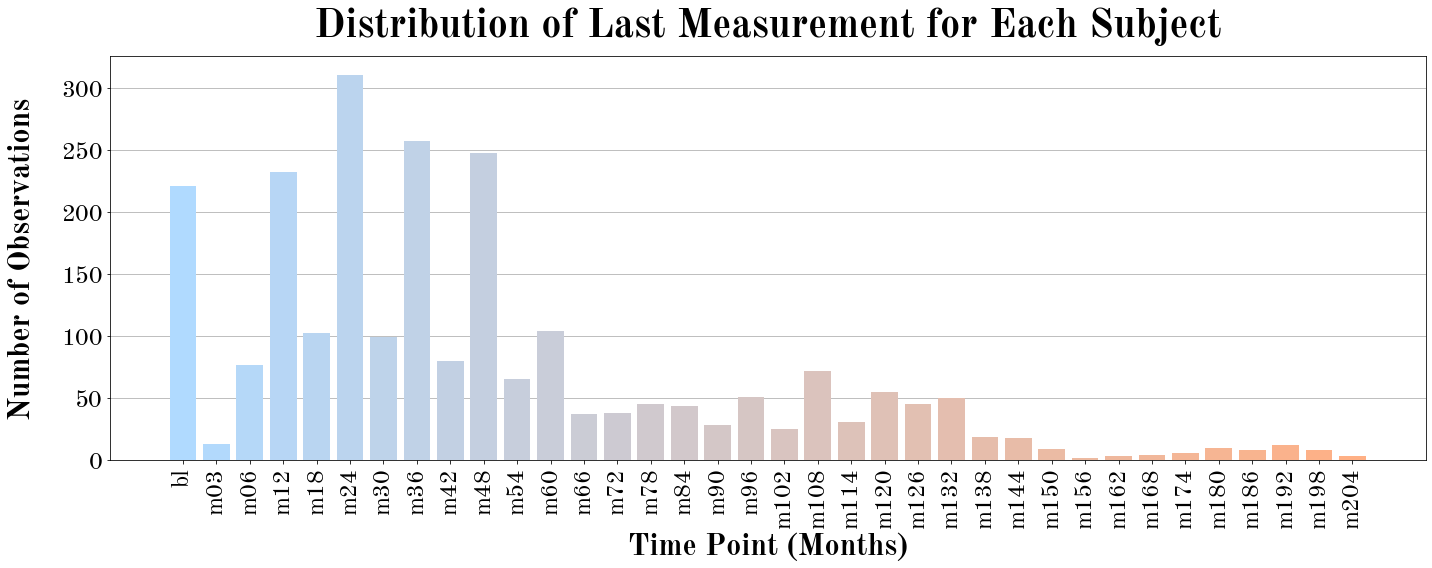

In [21]:
plt.figure(figsize=figure_size)

plt.bar(viscode_counts.index, viscode_counts.values, color=get_color_gradient(my_colors[0], my_colors[1], len(viscode_counts.index)), zorder=3)
plt.title('Distribution of Last Measurement for Each Subject', fontsize=40, fontproperties=prop_bold, pad=20)
plt.xlabel('Time Point (Months)', fontsize=30, fontproperties=prop_bold)
plt.ylabel('Number of Observations', fontsize=30, fontproperties=prop_bold, labelpad=25)
plt.xticks(rotation=90, fontsize=24,  fontproperties=prop_regular)
plt.yticks(fontsize=24,  fontproperties=prop_regular)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('figures/ADNI_last_measurements_timepoint.pdf')
plt.show()


### Transitions between diagnosis
Sankey diagram of DX changes

In [6]:
def hex_to_rgba(hex, opacity=1):
    hex = hex.lstrip('#')
    hlen = len(hex)
    return "rgba(" + ", ".join(str(int(hex[i:i+hlen//3], 16)) for i in range(0, hlen, hlen//3)) + f", {opacity})"

In [10]:
import plotly.graph_objects as go

df_dx_exploration = df[df['DX'].notna()][['RID', 'M', 'DX']]
df_dx_exploration.sort_values(['RID', 'M'])

def add_next_dx(group):
    if group.shape[0] < 2:
        return None
    first_measurement = group.iloc[0]
    last_dx = group.iloc[-1]['DX']
    first_measurement['next_DX'] = last_dx
    return first_measurement
df_dx_exploration = df_dx_exploration.sort_values(['RID', 'M'])
df_dx_exploration = df_dx_exploration.groupby('RID').apply(add_next_dx).dropna().reset_index(drop=True)
transitions = df_dx_exploration.groupby(['DX', 'next_DX']).size().reset_index(name='count')
transitions = transitions.rename(columns={0: 'count'})

display(transitions)

ordered_states = ['CN', 'MCI', 'AD']
# Create the labels list with 'From' and 'To' for each state in the specified order
label_list = ['From ' + state for state in ordered_states] + ['To ' + state for state in ordered_states]

# Create a mapping from state to the desired ordered index
state_to_index = {state: i for i, state in enumerate(ordered_states)}

# Use the mapping to get the ordered source and target indices
source = [state_to_index[state] for state in transitions['DX']]
target = [state_to_index[state] + len(ordered_states) for state in transitions['next_DX']]  # offset by the number of states
value=transitions['count'].tolist()

colors = get_color_gradient(my_colors[0], my_colors[1], 3)
box_color = [colors[(i)%3] for i in range(len(colors)*2)]

opacity = 0.5
link_colors = [hex_to_rgba(colors[2], opacity)]*3 + [hex_to_rgba(colors[0], opacity)]*3 + [hex_to_rgba(colors[1], opacity)]*3
print(link_colors)

fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=40,
      thickness=20,
      line=dict(color="black", width=0.),
      label=label_list,#transitions['DX'].append(transitions['next_DX']).unique(),
      color=box_color,

    ),
    link=dict(
      source=source,  # indices of the source positions
      target=target, #target,  # indices of the target positions
      value=value,
      color=link_colors,
      # opacity=0.5,
    ))])

fig.update_layout(width=1500, height=500,
                  title=dict(
                      text="Sankey Diagram of Subject Diagnosis (DX) Transitions",
                      x=0.5,
                      font=dict(
                          family="Old Standard TT Bold",
                          size=40,
                          color = 'black'
                      )
                  ),
                  font=dict(
                      family="Old Standard TT Bold",
                      size=25,
                      color = 'black'                    
                      ),
                  )
#To avoid stupid box comming in bottom left corner
fig.write_image('./figures/sankey_diagram2.pdf')
os.remove('figures/sankey_diagram2.pdf')

fig.write_image('./figures/sankey_diagram3.pdf')
fig.show()

,DX,next_DX,count
0,AD,AD,358
1,AD,MCI,5
2,CN,AD,36
3,CN,CN,601
4,CN,MCI,99
5,MCI,AD,368
6,MCI,CN,69
7,MCI,MCI,550


['rgba(255, 176, 133, 0.5)', 'rgba(255, 176, 133, 0.5)', 'rgba(255, 176, 133, 0.5)', 'rgba(176, 218, 255, 0.5)', 'rgba(176, 218, 255, 0.5)', 'rgba(176, 218, 255, 0.5)', 'rgba(216, 197, 194, 0.5)', 'rgba(216, 197, 194, 0.5)', 'rgba(216, 197, 194, 0.5)']


# Distribution of categorial features

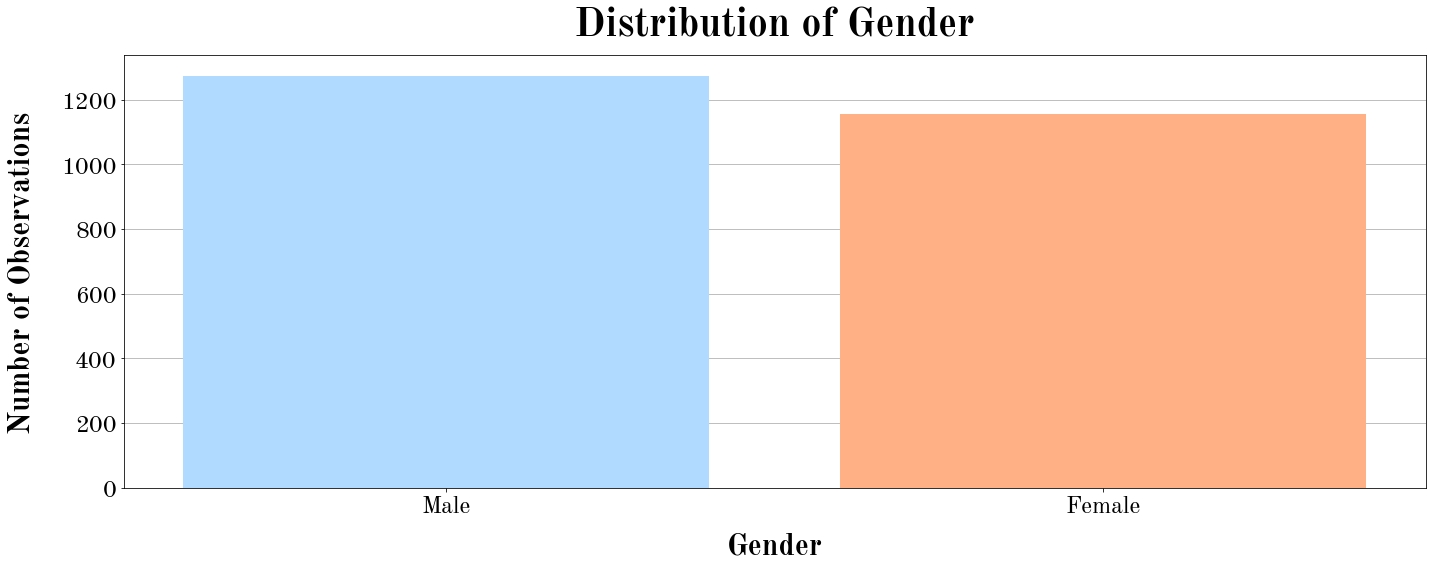

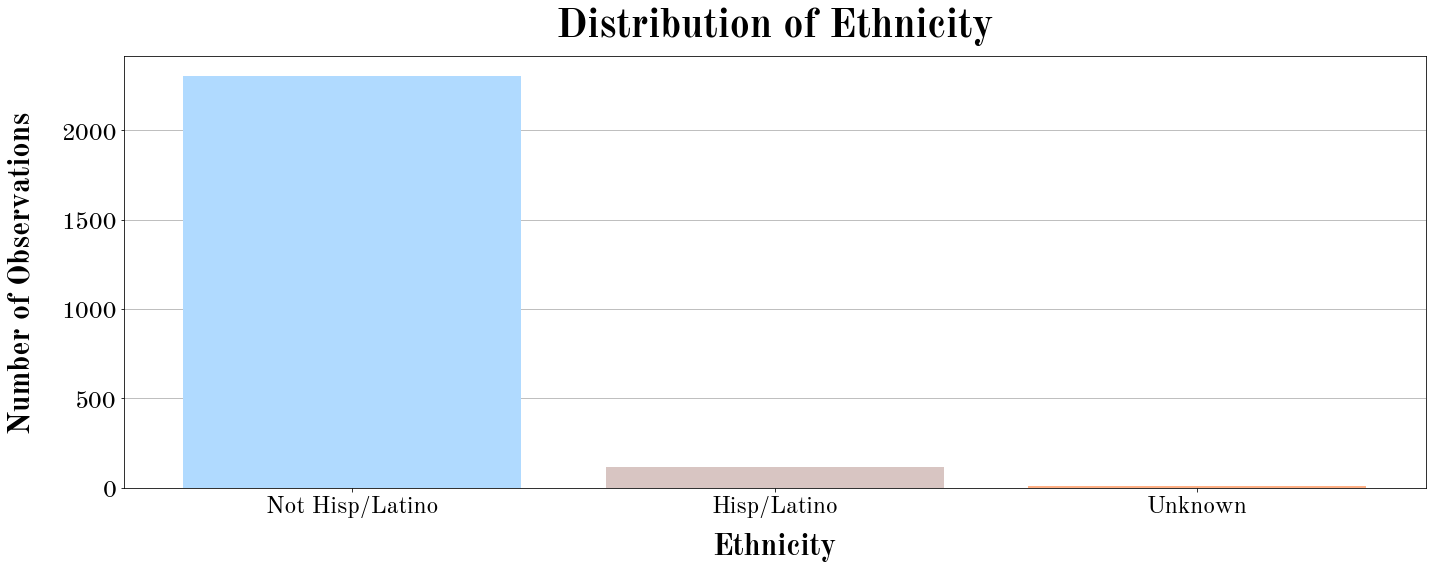

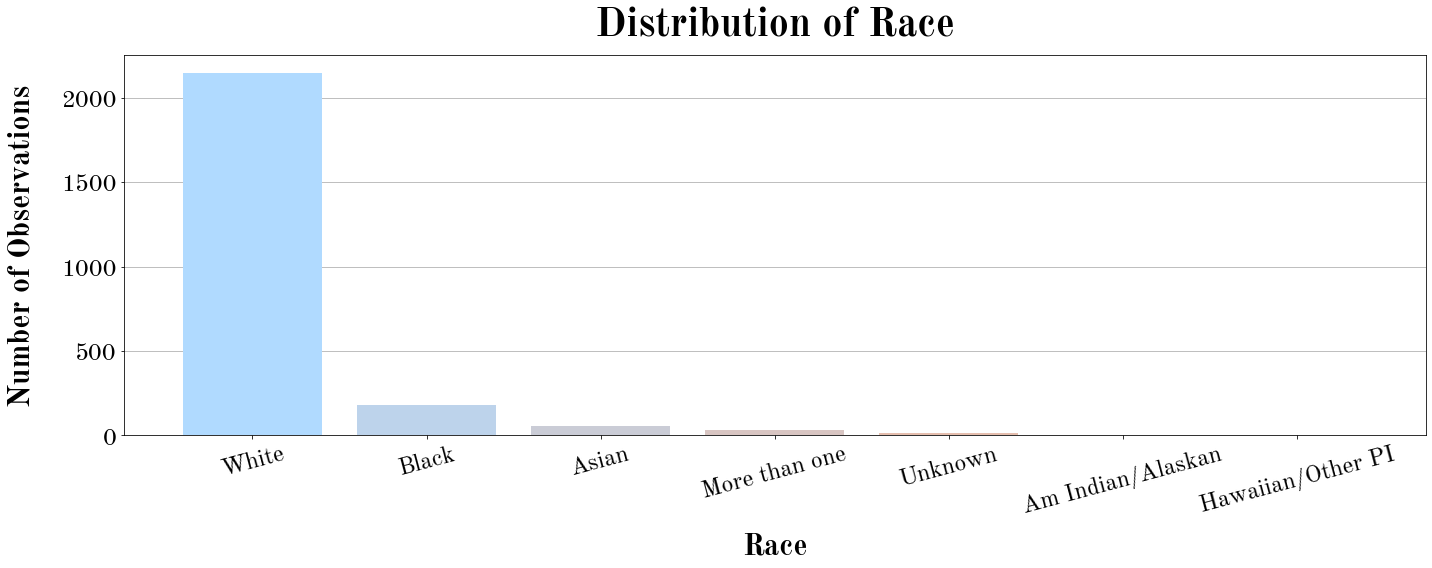

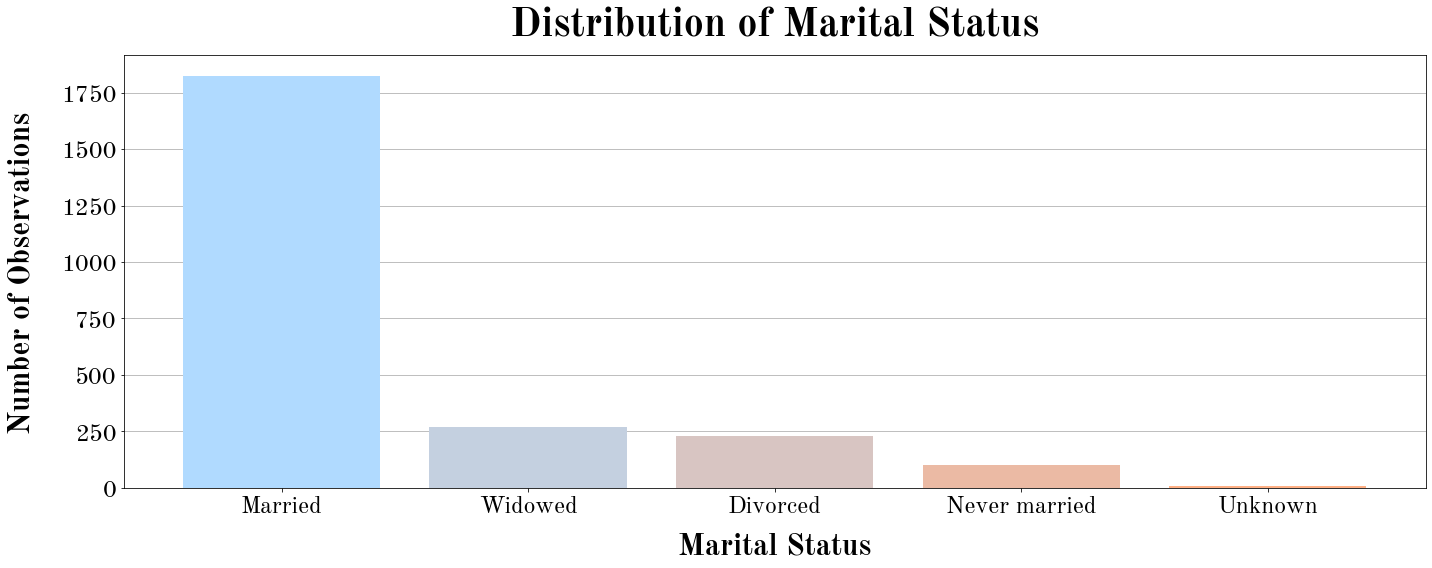

In [25]:
categories = ['PTGENDER', 'PTETHCAT', 'PTRACCAT', 'PTMARRY']
titles = ['Gender', 'Ethnicity', 'Race', 'Marital Status']
x_labels = ['Gender', 'Ethnicity', 'Race', 'Marital Status']
all_rids = set(df['RID'].unique())

# Dictionary to store the RIDs missing for each category

# for category in categories:
#     missing_rids_per_category = {}
#     # Find all RIDs with non-null entries for the category
#     rids_with_measurements = set(df[df[category].notna()]['RID'].unique())

#     # Determine RIDs missing measurements by subtracting the two sets
#     missing_rids = all_rids - rids_with_measurements

#     # Store the missing RIDs in the dictionary
#     missing_rids_per_category[category] = missing_rids

#     # Print category and the missing RIDs, if any
#     if missing_rids:
#         print(f"{len(missing_rids)} missing RIDs for {category}, {len(rids_with_measurements)} measurements left. Missing: {missing_rids}")
#     else:
#         print(f"All RIDs have measurements for {category}")


rotation = 0
for i, category in enumerate(categories):
    if category == 'PTRACCAT':
        rotation = 15
    else:
        rotation = 0
    first_entries_per_category = {}
    df_cat = df[(df[category].notna())]
    first_entry_per_rid = df_cat.sort_values(['RID','M']).groupby('RID').first().reset_index()

    count = first_entry_per_rid[category].value_counts()
    plt.figure(figsize=figure_size)
    plt.bar(count.index, count.values, color=get_color_gradient(my_colors[0], my_colors[1], len(count.index)), zorder=3)
    plt.title('Distribution of ' + titles[i], fontsize=40, fontproperties=prop_bold, pad=20)
    plt.xlabel(x_labels[i], fontsize=30, fontproperties=prop_bold, labelpad=15)
    plt.ylabel('Number of Observations', fontsize=30, fontproperties=prop_bold, labelpad=25)
    plt.xticks(rotation=rotation, fontsize=24,  fontproperties=prop_regular)
    plt.yticks(fontsize=24,  fontproperties=prop_regular)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(f"figures/value_distributions/{titles[i]}.pdf")
    plt.show()

17
['#b0daff', '#b5d7f7', '#bad5f0', '#bfd2e8', '#c4d0e0', '#c9cdd9', '#cecad1', '#d3c8ca', '#d8c5c2', '#dcc2ba', '#e1c0b3', '#e6bdab', '#ebbaa4', '#f0b89c', '#f5b594', '#fab38d', '#ffb085']


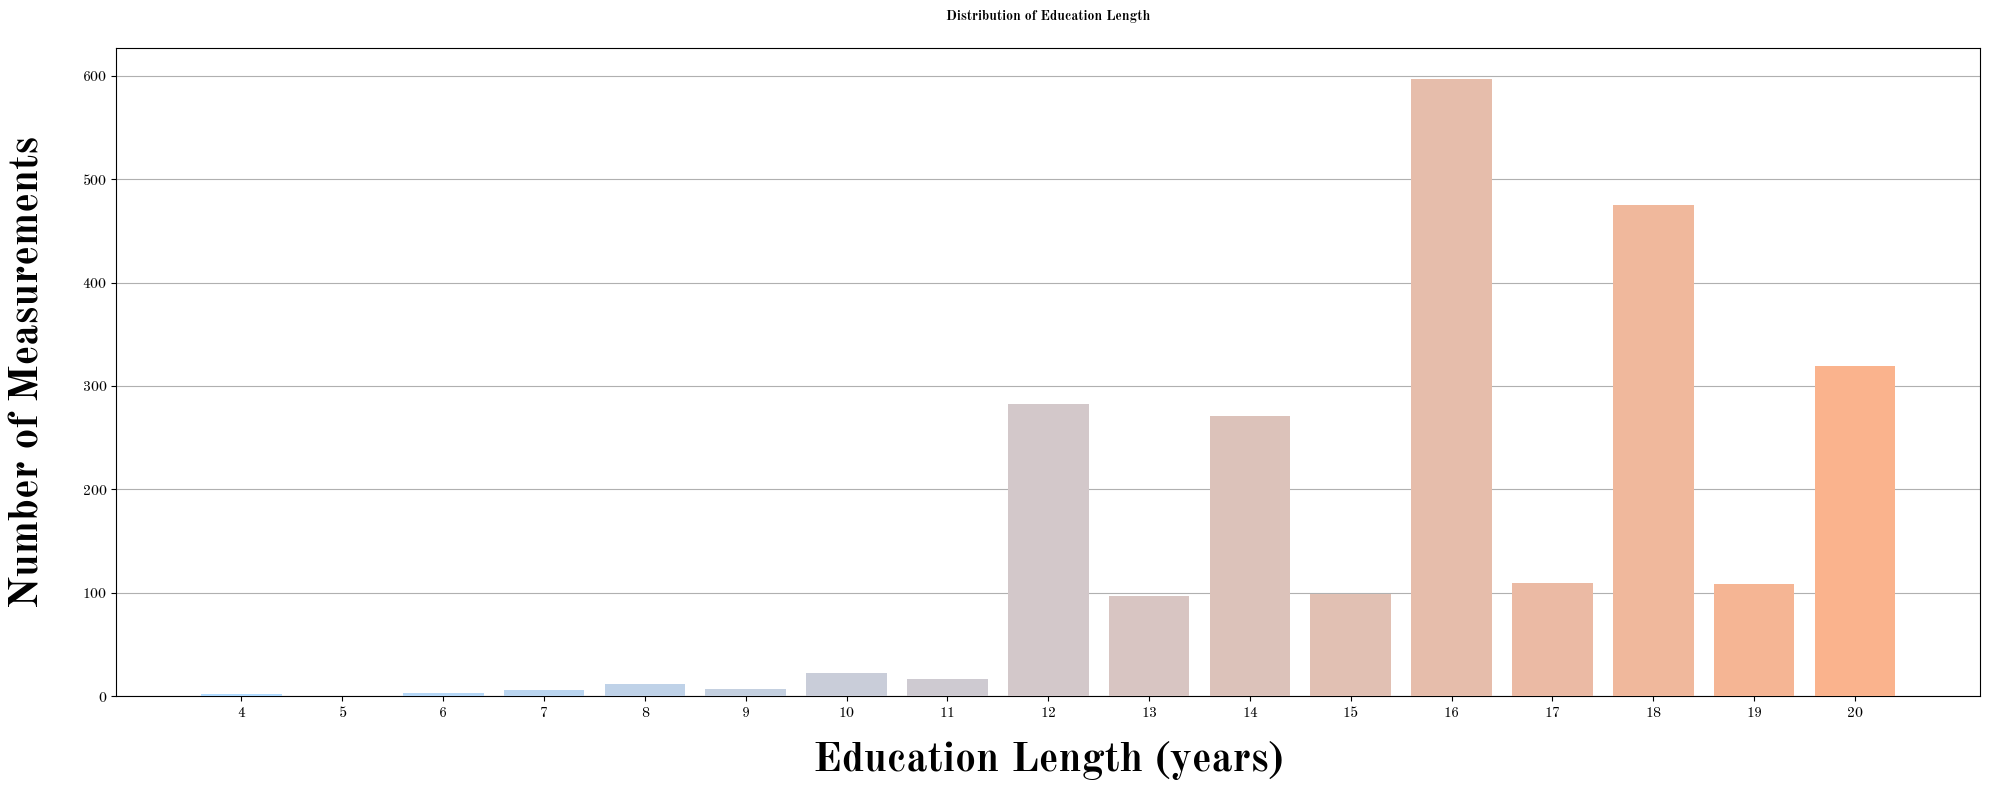

In [ ]:
PTEDUCAT_tick = np.arange(4, 21)
print(len(PTEDUCAT_tick))
print(get_color_gradient(my_colors[0], my_colors[1], len(PTEDUCAT_tick)))

# categories = ['PTEDUCAT', 'APOE4']
# titles = ['Education Length', 'APOE4 ']
# x_labels = ['Length (years)', 'Number of APOE4 Alleles']
category = 'PTEDUCAT'

first_entries_per_category = {}
df_cat = df[(df[category].notna())]
first_entry_per_rid = df_cat.sort_values(['RID','M']).groupby('RID').first().reset_index()


count = first_entry_per_rid[category].value_counts().sort_index()
plt.figure(figsize=figure_size)
plt.bar(count.index, count.values, color=get_color_gradient(my_colors[0], my_colors[1], len(PTEDUCAT_tick)), zorder=3)
plt.title('Distribution of Education Length', fontsize=40, fontproperties=prop_bold, pad=20)
plt.xlabel('Education Length (years)', fontsize=30, fontproperties=prop_bold, labelpad=15)
plt.ylabel('Number of Measurements', fontsize=30, fontproperties=prop_bold, labelpad=25)
plt.xticks(range(min(count.index), max(count.index)+1), fontsize=24,  fontproperties=prop_regular)
plt.yticks(fontsize=24,  fontproperties=prop_regular)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('figures/value_distributions/Education.pdf')
plt.show()

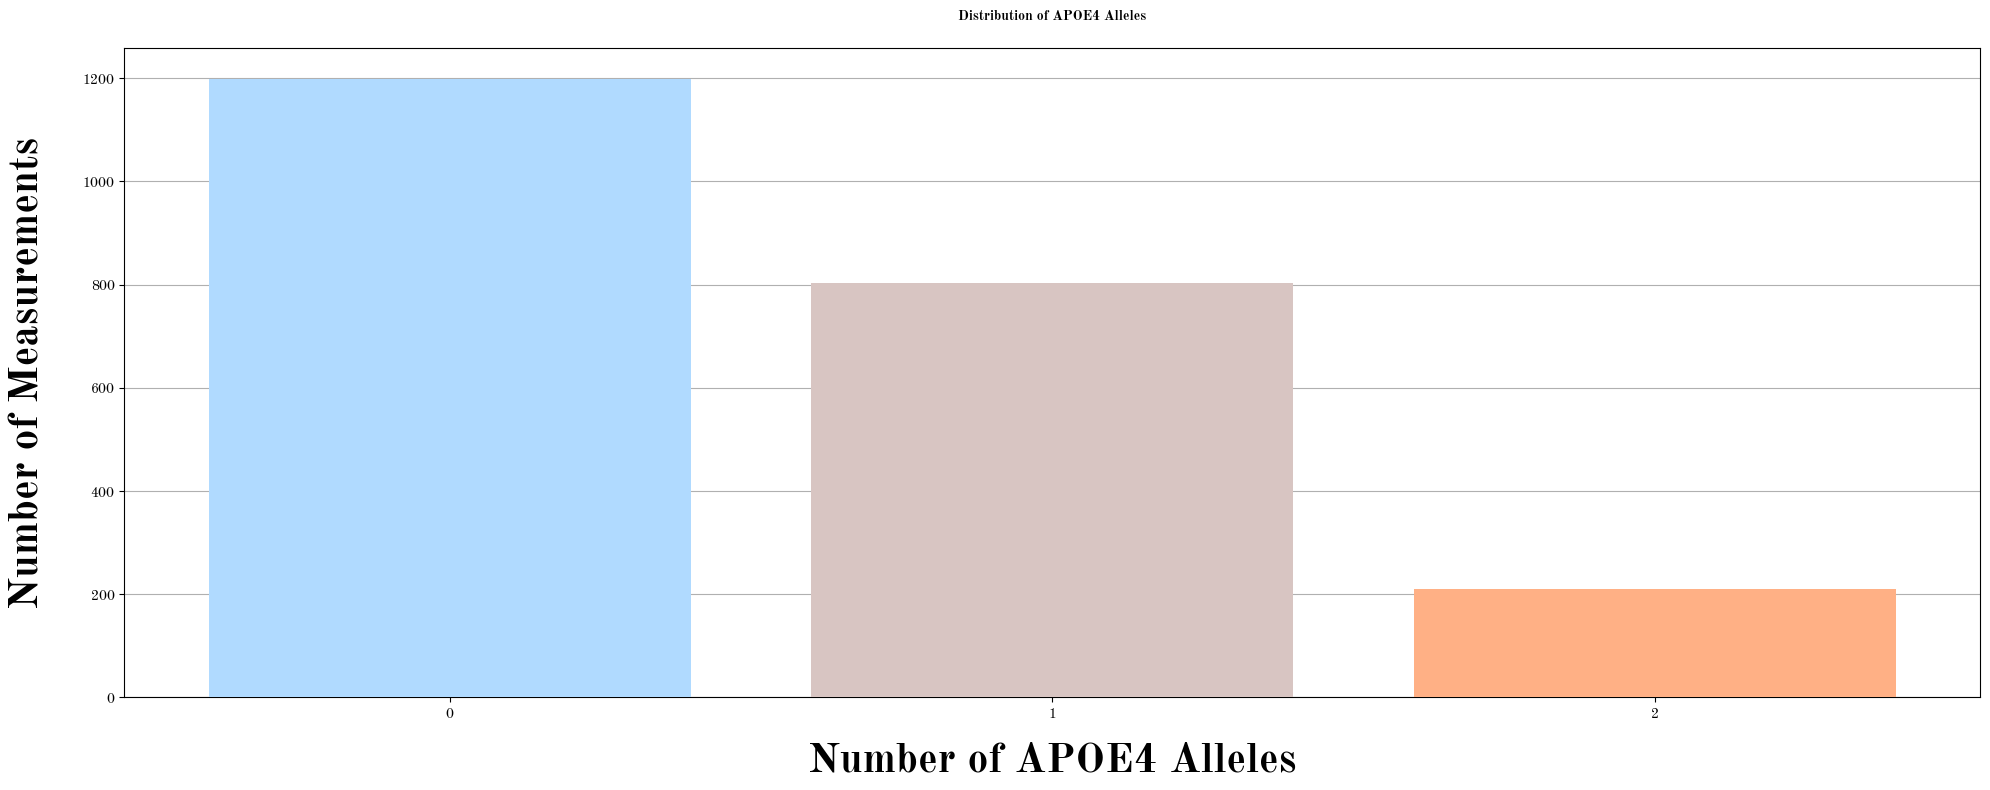

In [ ]:
category = 'APOE4'

first_entries_per_category = {}
df_cat = df[(df[category].notna())]
first_entry_per_rid = df_cat.sort_values(['RID','M']).groupby(['RID']).first().reset_index()

count = first_entry_per_rid[category].value_counts()
plt.figure(figsize=figure_size)
plt.bar(count.index, count.values, color=get_color_gradient(my_colors[0], my_colors[1], len(count.index)), zorder=3)
plt.title('Distribution of APOE4 Alleles', fontsize=40, fontproperties=prop_bold, pad=20)
plt.xlabel('Number of APOE4 Alleles', fontsize=30, fontproperties=prop_bold, labelpad=15)
plt.ylabel('Number of Measurements', fontsize=30, fontproperties=prop_bold, labelpad=25)
plt.xticks([0, 1, 2], fontsize=24,  fontproperties=prop_regular)
plt.yticks(fontsize=24,  fontproperties=prop_regular)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('figures/value_distributions/APOE4.pdf')
plt.show()

DX
MCI    1101
CN      895
AD      413
Name: count, dtype: int64


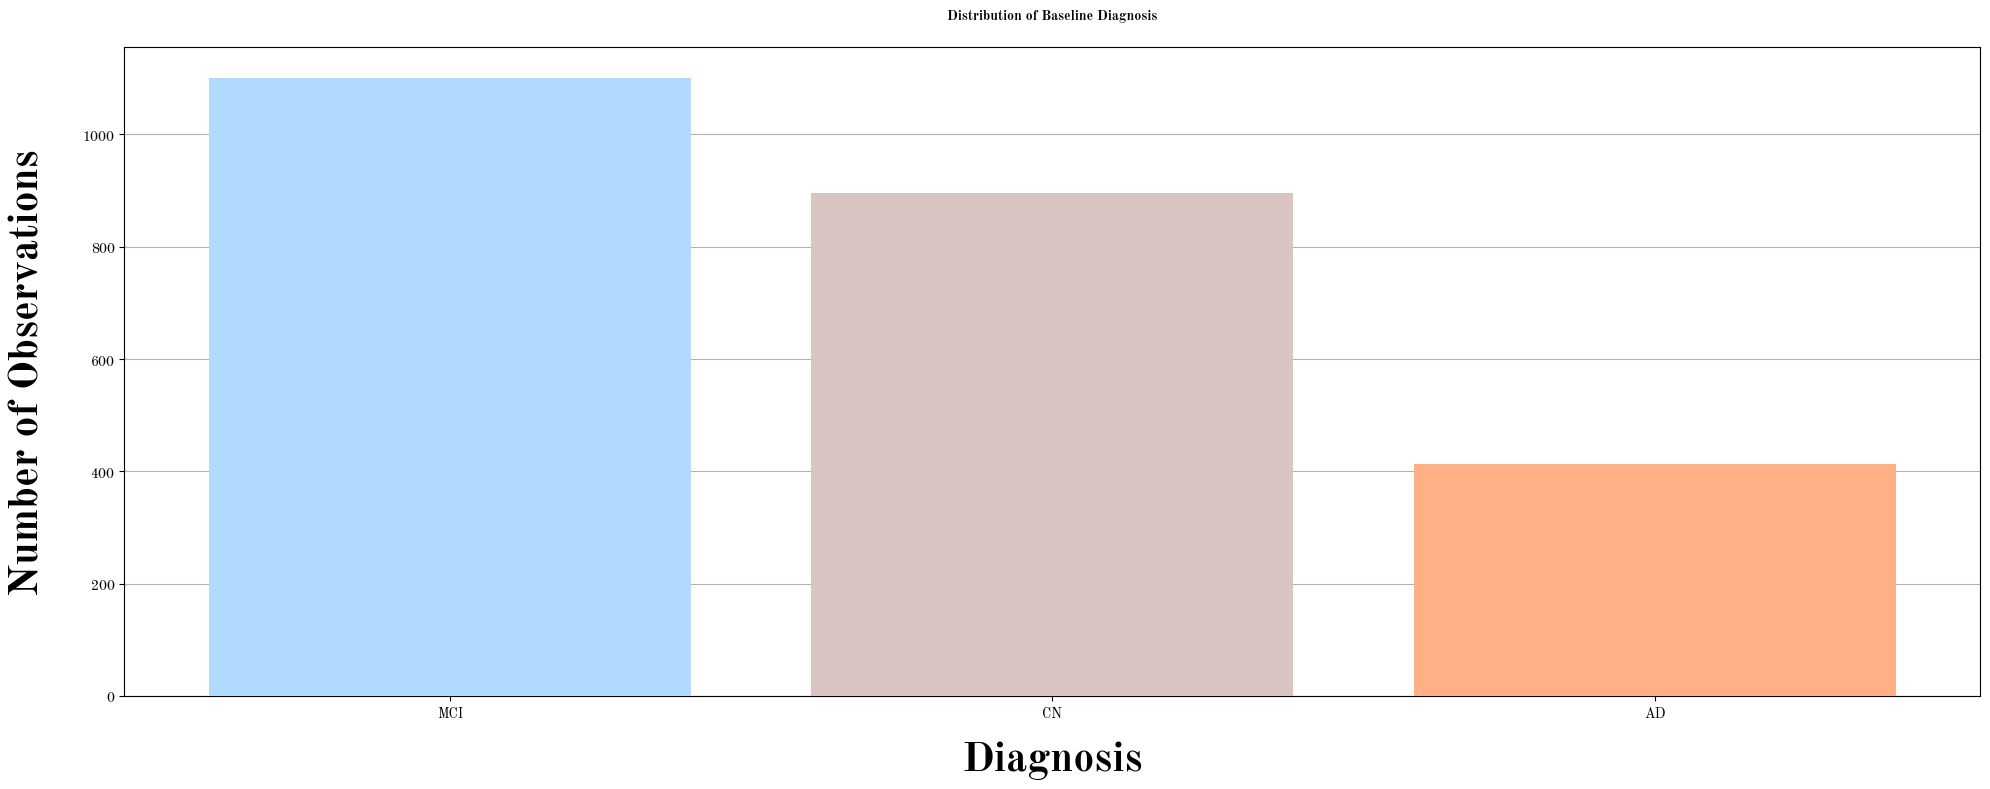

In [8]:
category = 'DX'

first_entry_per_rid = df.sort_values(['RID','M']).groupby(['RID']).first().reset_index()
# first_entry_per_rid = df[df['M']==0].dropna(subset=['DX'])
count = first_entry_per_rid[category].value_counts()
print(count)

plt.figure(figsize=figure_size)
bars = plt.bar(count.index, count.values, color=get_color_gradient(my_colors[0], my_colors[1], len(count.index)), zorder=3)

# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, yval, ha='center', va='bottom', fontsize=20, fontproperties=prop_regular)

plt.title('Distribution of Baseline Diagnosis', fontsize=40, fontproperties=prop_bold, pad=20)
plt.xlabel('Diagnosis', fontsize=30, fontproperties=prop_bold, labelpad=15)
plt.ylabel('Number of Observations', fontsize=30, fontproperties=prop_bold, labelpad=25)
plt.xticks([0, 1, 2], fontsize=24,  fontproperties=prop_regular)
plt.yticks(fontsize=24,  fontproperties=prop_regular)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('figures/value_distributions/DX.pdf')
plt.show()

# Inspecting the 'Events'

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
import pandas as pd
# Assuming 'df' is your DataFrame
df_copy = df.copy()
#Remove rows with only 1 measurement
df_copy = df_copy.groupby('RID').filter(lambda x: len(x) > 1)
# Remove rows with empty DX
df_copy = df_copy[df_copy['DX'].notna()]
#Remove with AD at baseline
rids_to_remove = df_copy[(df_copy['DX'] == 'AD') & (df_copy['M'] == 0)]['RID'].unique()
# Remove these RIDs from the DataFrame
df_copy = df_copy[~df_copy['RID'].isin(rids_to_remove)]
# Sort by 'RID' and 'M'
df_copy = df_copy.sort_values(by=['RID', 'M'])

# Function to check if a conversion from 'DX' = 2 to 'DX' != 2 happens later in time
def find_converters(group):
    dx_values = group['DX'].values
    for i in range(1, len(dx_values)):
        if dx_values[i-1] == 'AD' and dx_values[i] != 'AD':
            return group['RID'].iloc[0]
    return None

# Filter RIDs that meet the conversion criteria
RIDs = df_copy.groupby('RID').apply(find_converters).dropna().index

# Output the RIDs
print(RIDs, len(RIDs))
print(f"Number of total observations for the users: {len(df[df['RID'].isin(RIDs)])}")

Index([ 135,  166,  416,  429,  467,  555,  566,  702, 2130, 2210, 2274, 2367,
       4005, 4114, 4293, 4426, 4430, 4434, 4506, 4706, 4741, 4746, 4899, 4947,
       6222, 6535],
      dtype='int64', name='RID') 26
Number of total observations for the users: 285


In [ ]:
# RIDs = np.arange(20, 30)
# for rid in RIDs:
#     df_rid = df[df['RID'] == rid].sort_values(by='Years_bl')[['DX', 'Years_bl', 'DX_bl']]
#     print(f'{rid}:\n {df_rid}')

#     # Convert 'DX' column to string type to handle any NaN or non-string types
#     df_rid['DX'] = df_rid['DX'].astype(str)

#     # Plotting
#     plt.figure(figsize=(10, 5))  # Set the figure size for better readability
#     plt.plot(df_rid['Years_bl'], df_rid['DX'], marker='o', linestyle='-')  # Line plot with markers

#     # Adding labels and title
#     plt.xlabel('Years from Baseline (Years_bl)')
#     plt.ylabel('Diagnosis (DX)')
#     plt.title(f'Timeline of Diagnosis for Patient RID {rid}')

#     # Improve layout to better handle categorical y-ticks
#     plt.yticks(rotation=45)  # Rotate labels to avoid overlap
#     plt.grid(axis='y')  # Enable grid for better readability

#     plt.tight_layout()
#     # Show the plot
#     plt.show()

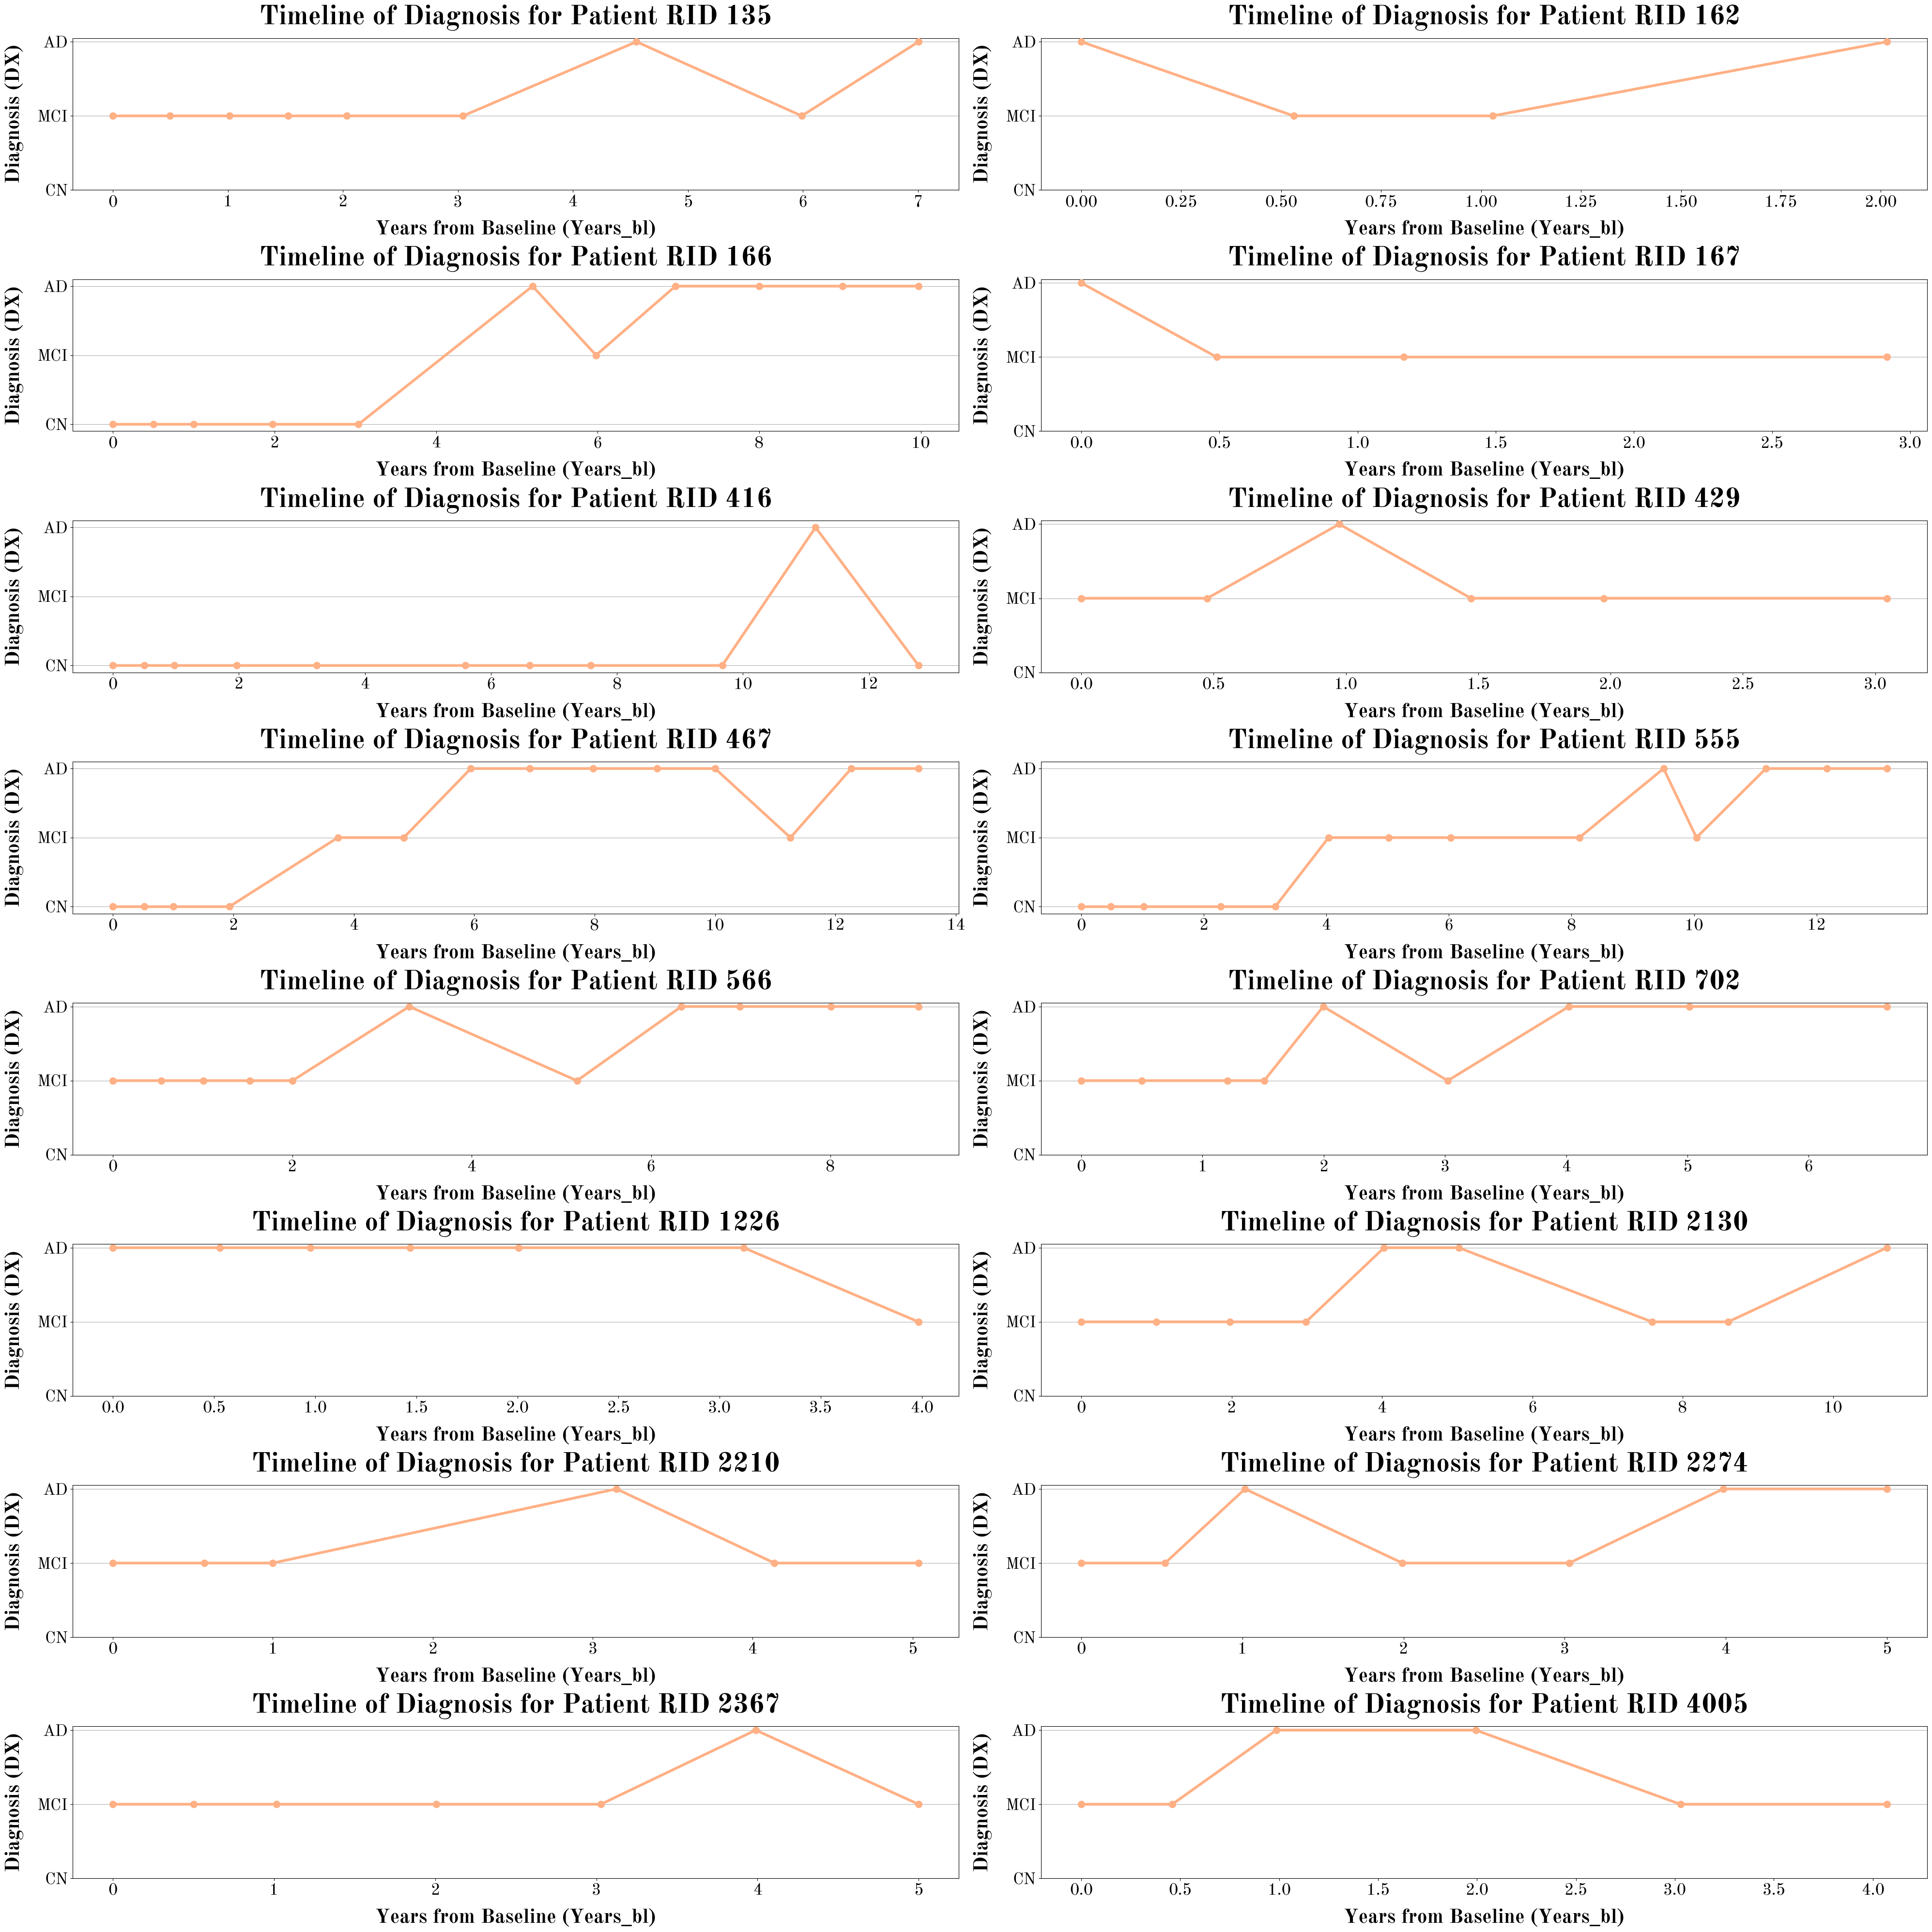

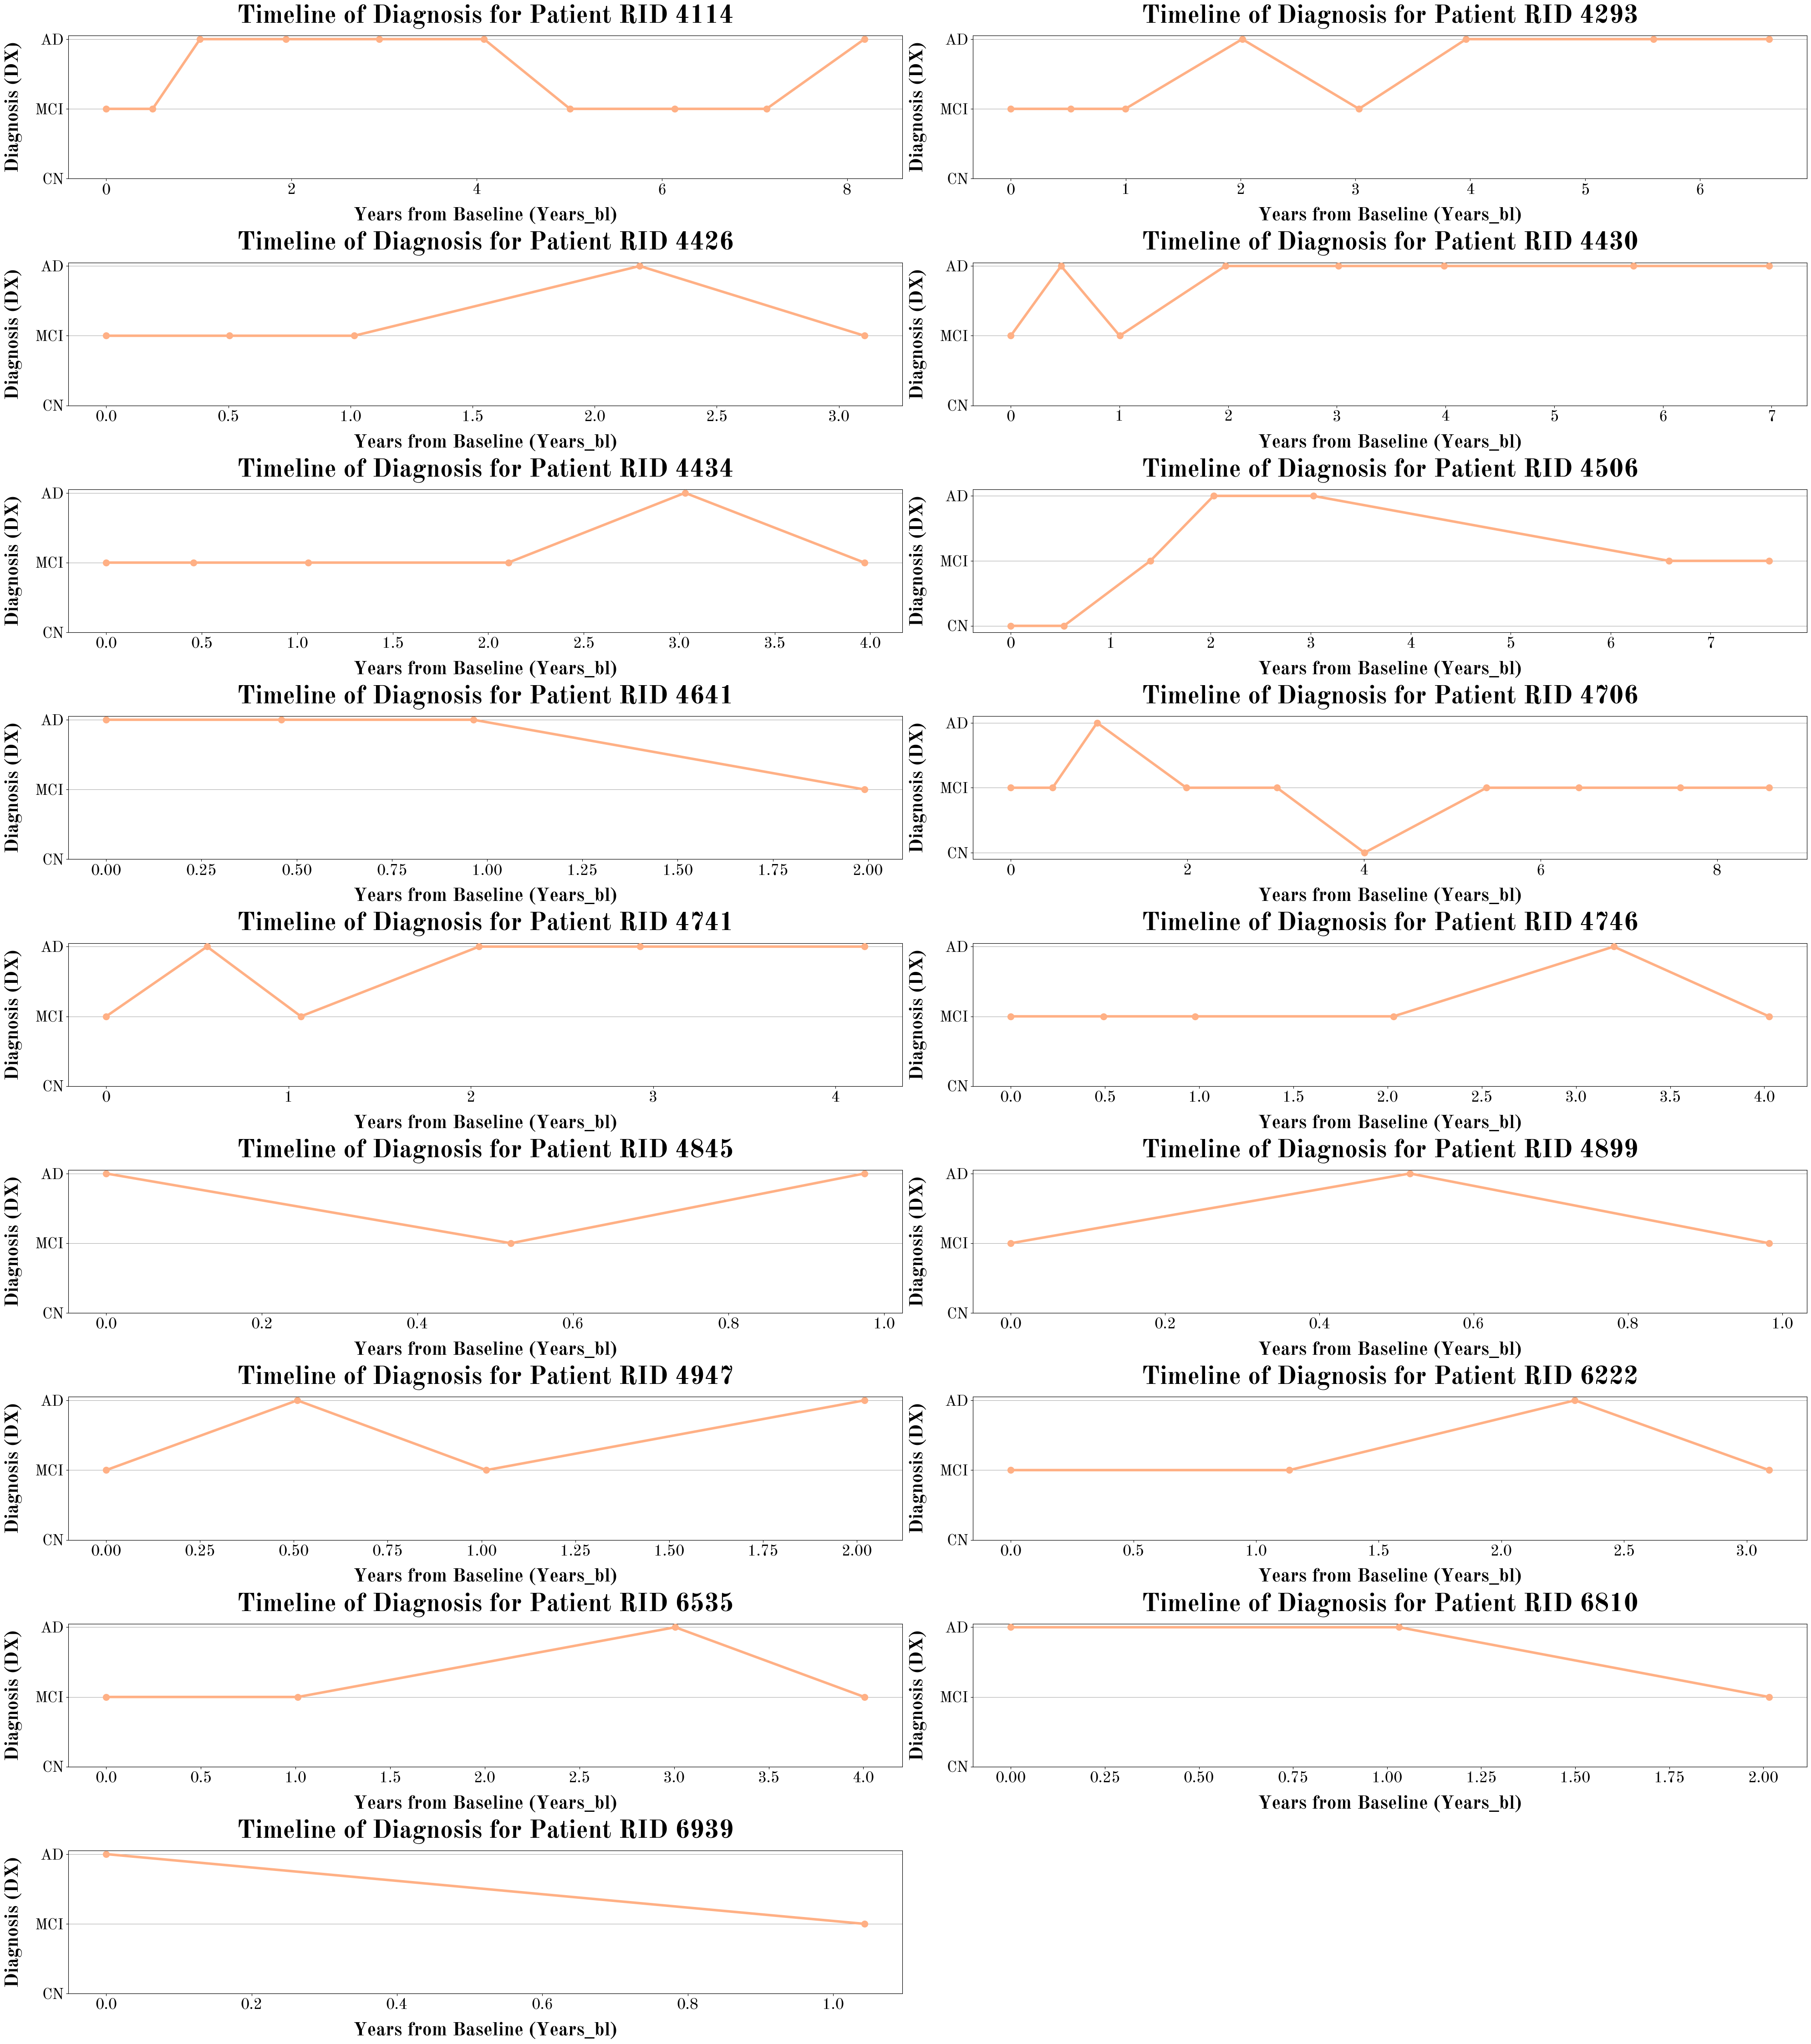

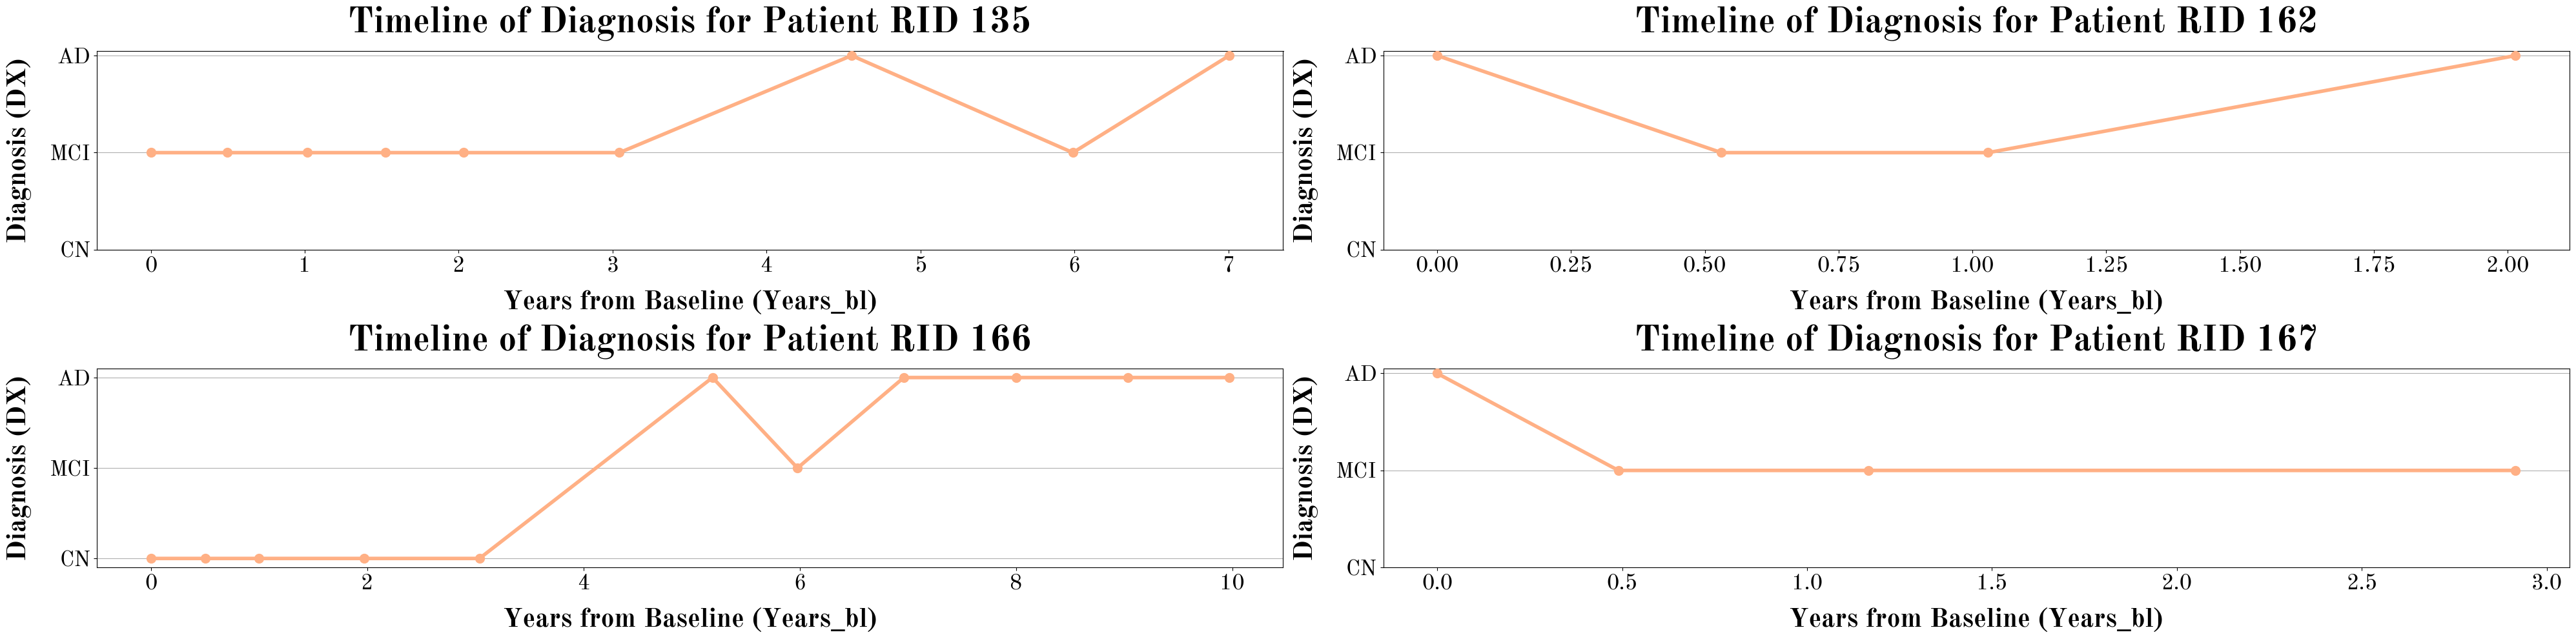

In [ ]:
# Define the desired order of categories including a string for NaN
diagnosis_categories = ['CN', 'MCI', 'AD']
category_mapping = {cat: i for i, cat in enumerate(diagnosis_categories)}

# Update mapping to handle actual NaN values as a category
# category_mapping[np.nan] = 0  # Assign NaN values to the first category which is 'NaN'

# Number of RIDs and setup for subplot dimensions
half_index = int(len(RIDs) / 2)
first_half = RIDs[:half_index]
second_half = RIDs[half_index:]
two_parts = [first_half, second_half]

def plot_diagnosis_over_time(rids, filename):
    n_rids = len(rids)
    n_cols = 2
    n_rows = int(np.ceil(n_rids / n_cols))

    # Create a figure and axes with subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(40, 5 * n_rows))  # Adjust figsize as necessary

    # Flatten the axes array for easy iteration
    axs = axs.flatten()

    # Loop through each RID and plot on a subplot
    for index, rid in enumerate(rids):
        # Filter the DataFrame for the specific RID and ensure the data is sorted
        tmp = df_transformed[df_transformed['DX'].notna()]
        df_rid = tmp[df_transformed['RID'] == rid].sort_values(by='Years_bl')[['DX', 'Years_bl']]

        # Replace NaN and None with 'NaN' if not already done
        df_rid['DX'] = df_rid['DX'].fillna('NaN')

        # Map 'DX' values to their corresponding numeric categories
        df_rid['DX_mapped'] = df_rid['DX'].map(category_mapping).astype(float)  # Use float to allow NaN handling

        # Plotting on the designated subplot axis
        axs[index].plot(df_rid['Years_bl'], df_rid['DX_mapped'], marker='o', linestyle='-', markersize=10, linewidth=4, color=my_colors[1], zorder=3)  # Line plot with markers

        # Adding labels and title
        axs[index].set_title(f'Timeline of Diagnosis for Patient RID {rid}', fontproperties=prop_bold, pad=20, fontsize=40)
        axs[index].set_xlabel('Years from Baseline (Years_bl)', fontsize=30, fontproperties=prop_bold, labelpad=15)
        axs[index].set_ylabel('Diagnosis (DX)', fontsize=30, fontproperties=prop_bold, labelpad=20)

        # Set the y-axis tick labels for each subplot
        axs[index].set_yticks(list(category_mapping.values()))
        axs[index].set_yticklabels(list(category_mapping.keys()))

        for label in axs[index].get_xticklabels() + axs[index].get_yticklabels():
            label.set_fontproperties(prop_regular)
            label.set_fontsize(24)

        axs[index].grid(axis='y')

    # Adjust layout to prevent overlap
    fig.subplots_adjust(hspace=100, wspace=0.2)


    fig.tight_layout()
    if n_rids % n_cols:
        axs[-1].axis('off')

    # plt.savefig(filename)

    # Show the plot
    plt.show()

for i, rids in enumerate(two_parts):
    plot_diagnosis_over_time(rids, f"figures/diagnosis_over_time{i+1}.pdf")

small_rids = RIDs[:4]
plot_diagnosis_over_time(small_rids, f"figures/diagnosis_over_time_small.pdf")

### Users who are missing diagnosis in all entries

In [ ]:
# Group by 'RID' and check if all 'DX' are NaN for each group
empty_dx_rids = df.groupby('RID')['DX'].apply(lambda x: x.isna().all())

# Filter RIDs where all DX are NaN
rids_with_all_empty_dx = empty_dx_rids[empty_dx_rids].index.tolist()

print(f"{len(rids_with_all_empty_dx)} RIDs with all empty DX values.")
print(rids_with_all_empty_dx)

21 RIDs with all empty DX values.
[2071, 2314, 4085, 4264, 4459, 4575, 4622, 4740, 4963, 4993, 6390, 6627, 6701, 6712, 6794, 6880, 6883, 6906, 6912, 6919, 7125]


## Missing DX exploration

COLPROT
ADNI2     2332
ADNI3     1156
ADNI1     1146
ADNIGO     329
Name: count, dtype: int64

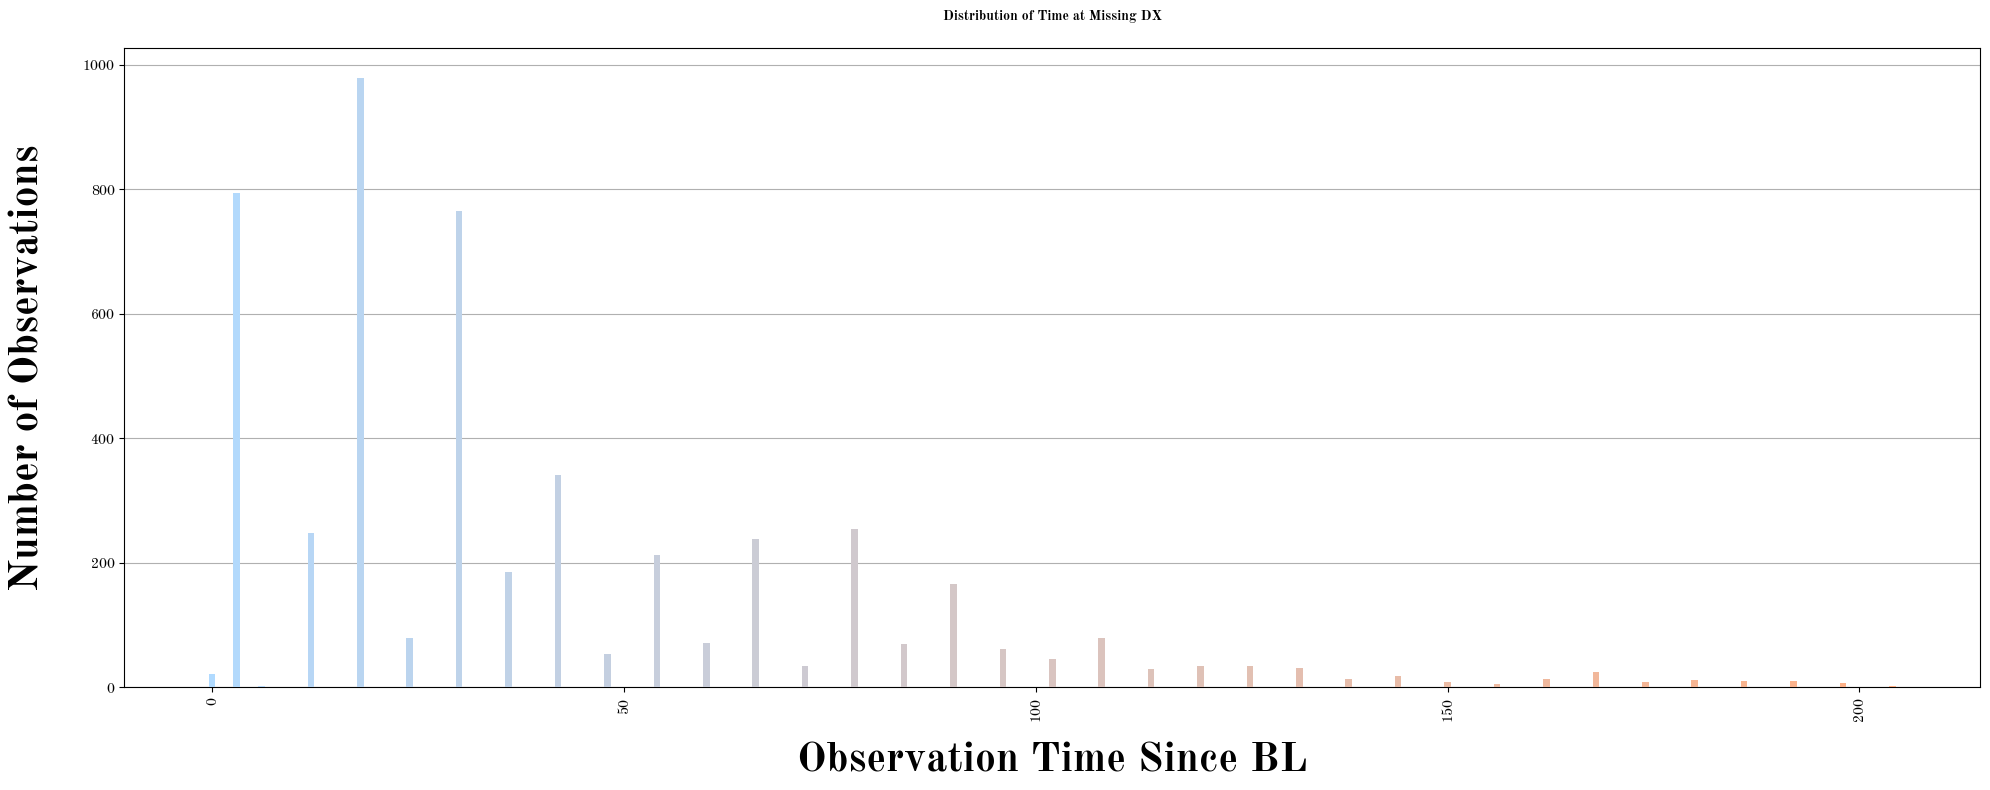

In [34]:
df_missing_dx = df[df['DX'].isna()]

display(df_missing_dx['COLPROT'].value_counts())
count_m = df_missing_dx['M'].value_counts().sort_index()
plt.figure(figsize=figure_size)
plt.bar(count_m.index, count_m.values, color=get_color_gradient(my_colors[0], my_colors[1], len(count_m)), zorder=3)
plt.title('Distribution of Time at Missing DX', fontsize=40, fontproperties=prop_bold, pad=20)
plt.xlabel('Observation Time Since BL', fontsize=30, fontproperties=prop_bold, labelpad=15)
plt.ylabel('Number of Observations', fontsize=30, fontproperties=prop_bold, labelpad=25)
plt.xticks(rotation=90, fontsize=24,  fontproperties=prop_regular)
plt.yticks(fontsize=24,  fontproperties=prop_regular)
plt.grid(axis='y')
plt.tight_layout()
# plt.savefig('figures/value_distributions/Education.pdf')
plt.show()

# How many start with AD

In [ ]:
# print(df[df['DX_bl'] == 'AD']['RID'].count())
# print(df[df['DX_bl'] == 'AD']['RID'].nunique())

In [ ]:
def hex_to_rbg(hex_color):
    h = hex_color.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

[0, 5013, 11958, 15617]


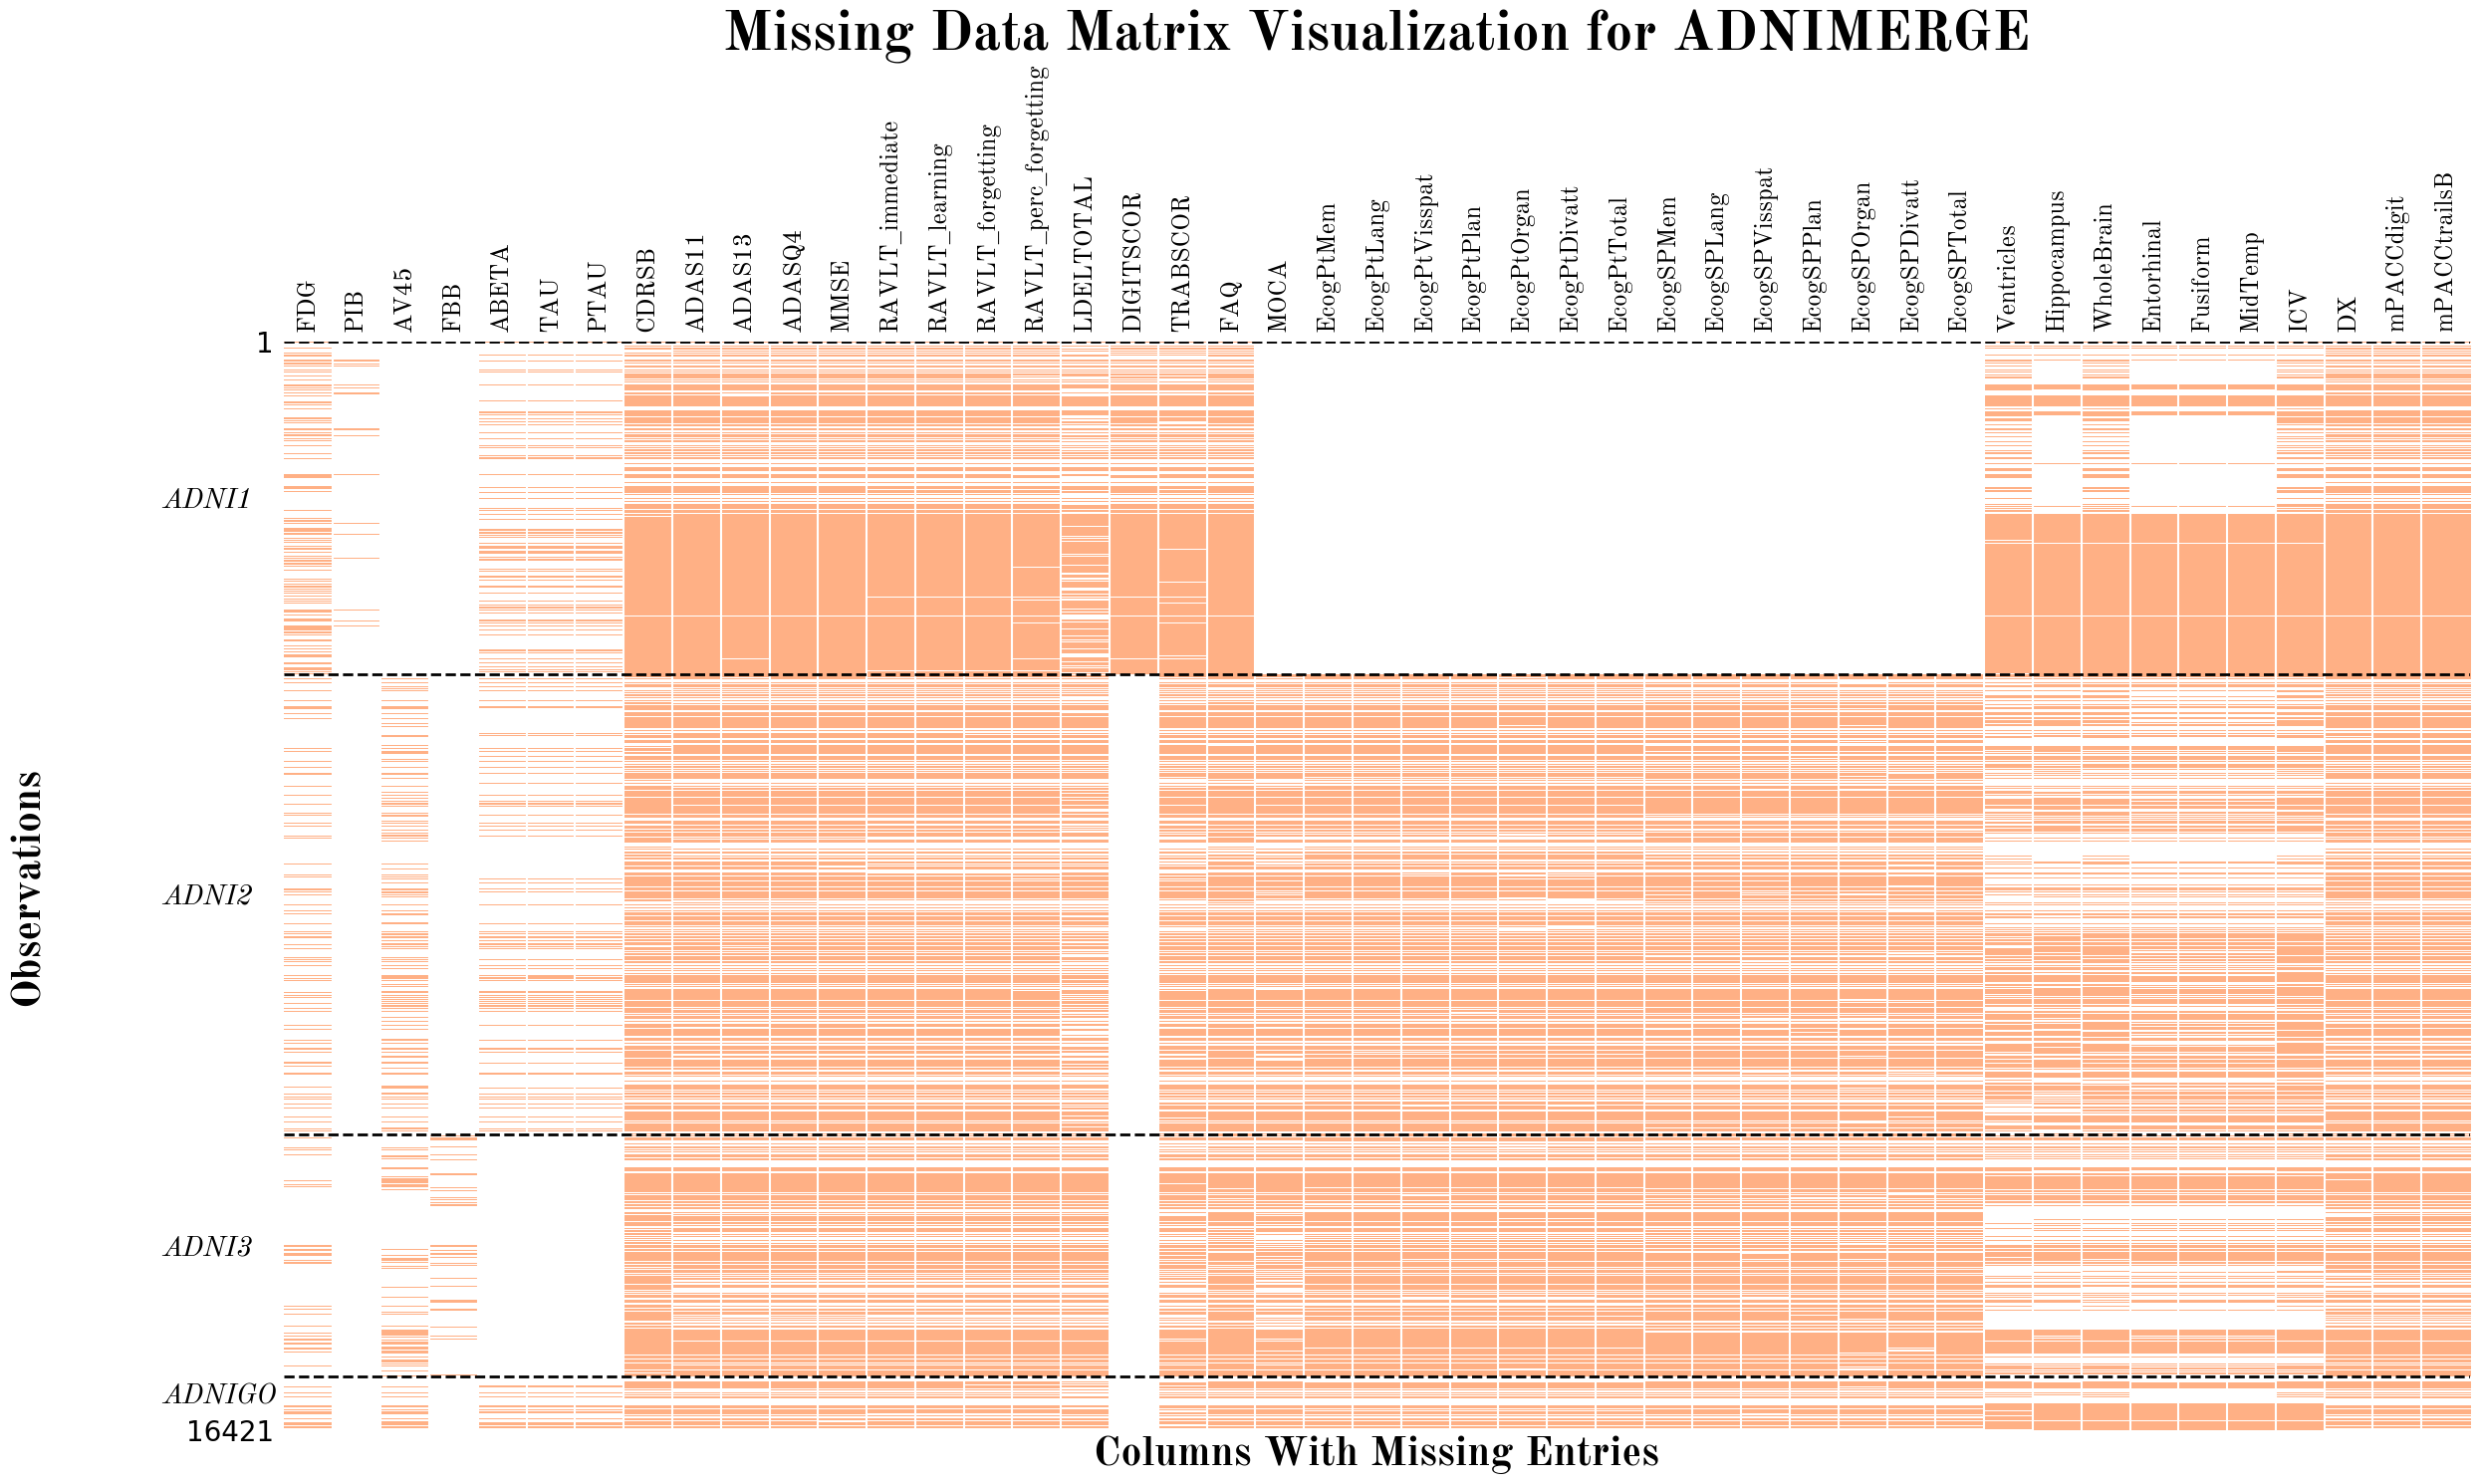

In [ ]:
import missingno as msno
# df_na = df.replace('', np.nan)
columns_df_na = df.columns[df.isnull().mean() < 0.1].drop('COLPROT')

irrelevant_columns = ["IMAGEUID", "FSVERSION", "FLDSTRENG"]

df_na = df.sort_values(["COLPROT"])
df_na = df_na.drop(columns_df_na, axis=1).drop(irrelevant_columns, axis=1)
previous_cohort = None
annot_positions = [0]
for idx, (i, row) in enumerate(df_na.iterrows()):
    current_cohort = row['COLPROT']
    if current_cohort != previous_cohort:
        if previous_cohort is not None:
            annot_positions.append(idx)
        previous_cohort = current_cohort
print(annot_positions)

#xddddd
y_placements = [annot_positions[1] - annot_positions[0], annot_positions[2] - annot_positions[1], annot_positions[3] - annot_positions[2], len(df) - annot_positions[3]]

msno.matrix(df_na.drop('COLPROT', axis=1), sparkline=False, color=hex_to_rbg(my_colors[1]), labels=True, figsize=(25, 15))
plt.title('Missing Data Matrix Visualization for ADNIMERGE', fontproperties=prop_bold, fontsize=40)
plt.xlabel('Columns With Missing Entries', fontproperties=prop_bold, fontsize=30)
plt.ylabel('Observations', fontproperties=prop_bold, fontsize=30, labelpad=100)
plt.xticks(rotation=90, fontproperties=prop_regular, fontsize=18, horizontalalignment='center')
plt.yticks([], minor=True)#fontproperties=prop_regular, fontsize=18)

# Add annotations in the plot at calculated positions
for position, y_placement in zip(annot_positions, y_placements):
    plt.axhline(y=position, color='black', linestyle='--', linewidth=2)  # Draw a line at the change of cohorts
    plt.text(x=-3, y=position+y_placement/2, s=df_na['COLPROT'].iloc[position], fontproperties=prop_italic, fontsize=20, color='black')

plt.tight_layout()
plt.savefig("figures/missing_data_matrix_adni.png")
plt.show()


In [22]:
from Utils.Get_adni import get_merge
df_base = get_merge(fill_dx_manually=True, remove_dx=True, prepare_sa=True, cutoff=0.7, keep_cohort=True)
df.columns

c:\Users\dbior\OneDrive - Aarhus Universitet\Dokumenter\1. Uni\10. Semester\Master-project\Code\Cluster\EDA\..\Utils\Get_adni.py:45: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datapath)
2024-05-29 21:12:40.000 | INFO     | Utils.Get_adni:get_merge:88 - Missing value feature cutoff: 70.0 %
2024-05-29 21:12:40.000 | INFO     | Utils.Get_adni:get_merge:89 - Removing columns with cutoff: Index(['PIB', 'FBB'], dtype='object')
2024-05-29 21:12:40.000 | INFO     | Utils.Get_adni:get_merge:109 - Categorical columns: Index(['ORIGPROT', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'FLDSTRENG',
       'FSVERSION'],
      dtype='object')
2024-05-29 21:12:40.016 | INFO     | Utils.Get_adni:get_merge:117 - Data shape = (1723, 64)


Index(['RID', 'COLPROT', 'SITE', 'AGE', 'PTEDUCAT', 'APOE4', 'FDG', 'AV45',
       'ABETA', 'TAU', 'PTAU', 'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE',
       'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting',
       'RAVLT_perc_forgetting', 'LDELTOTAL', 'DIGITSCOR', 'TRABSCOR', 'FAQ',
       'MOCA', 'EcogPtMem', 'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan',
       'EcogPtOrgan', 'EcogPtDivatt', 'EcogPtTotal', 'EcogSPMem', 'EcogSPLang',
       'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt',
       'EcogSPTotal', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal',
       'Fusiform', 'MidTemp', 'ICV', 'DX', 'mPACCdigit', 'mPACCtrailsB', 'M',
       'Event', 'PTMARRY_Never_married', 'PTMARRY_married', 'ORIGPROT_ADNI2',
       'ORIGPROT_ADNI3', 'ORIGPROT_ADNIGO', 'PTGENDER_Male',
       'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown', 'PTRACCAT_Other',
       'PTRACCAT_White', 'FLDSTRENG_3 Tesla MRI',
       'FSVERSION_Cross-Sectional FreeSurfer (6.0)',
       'FSV

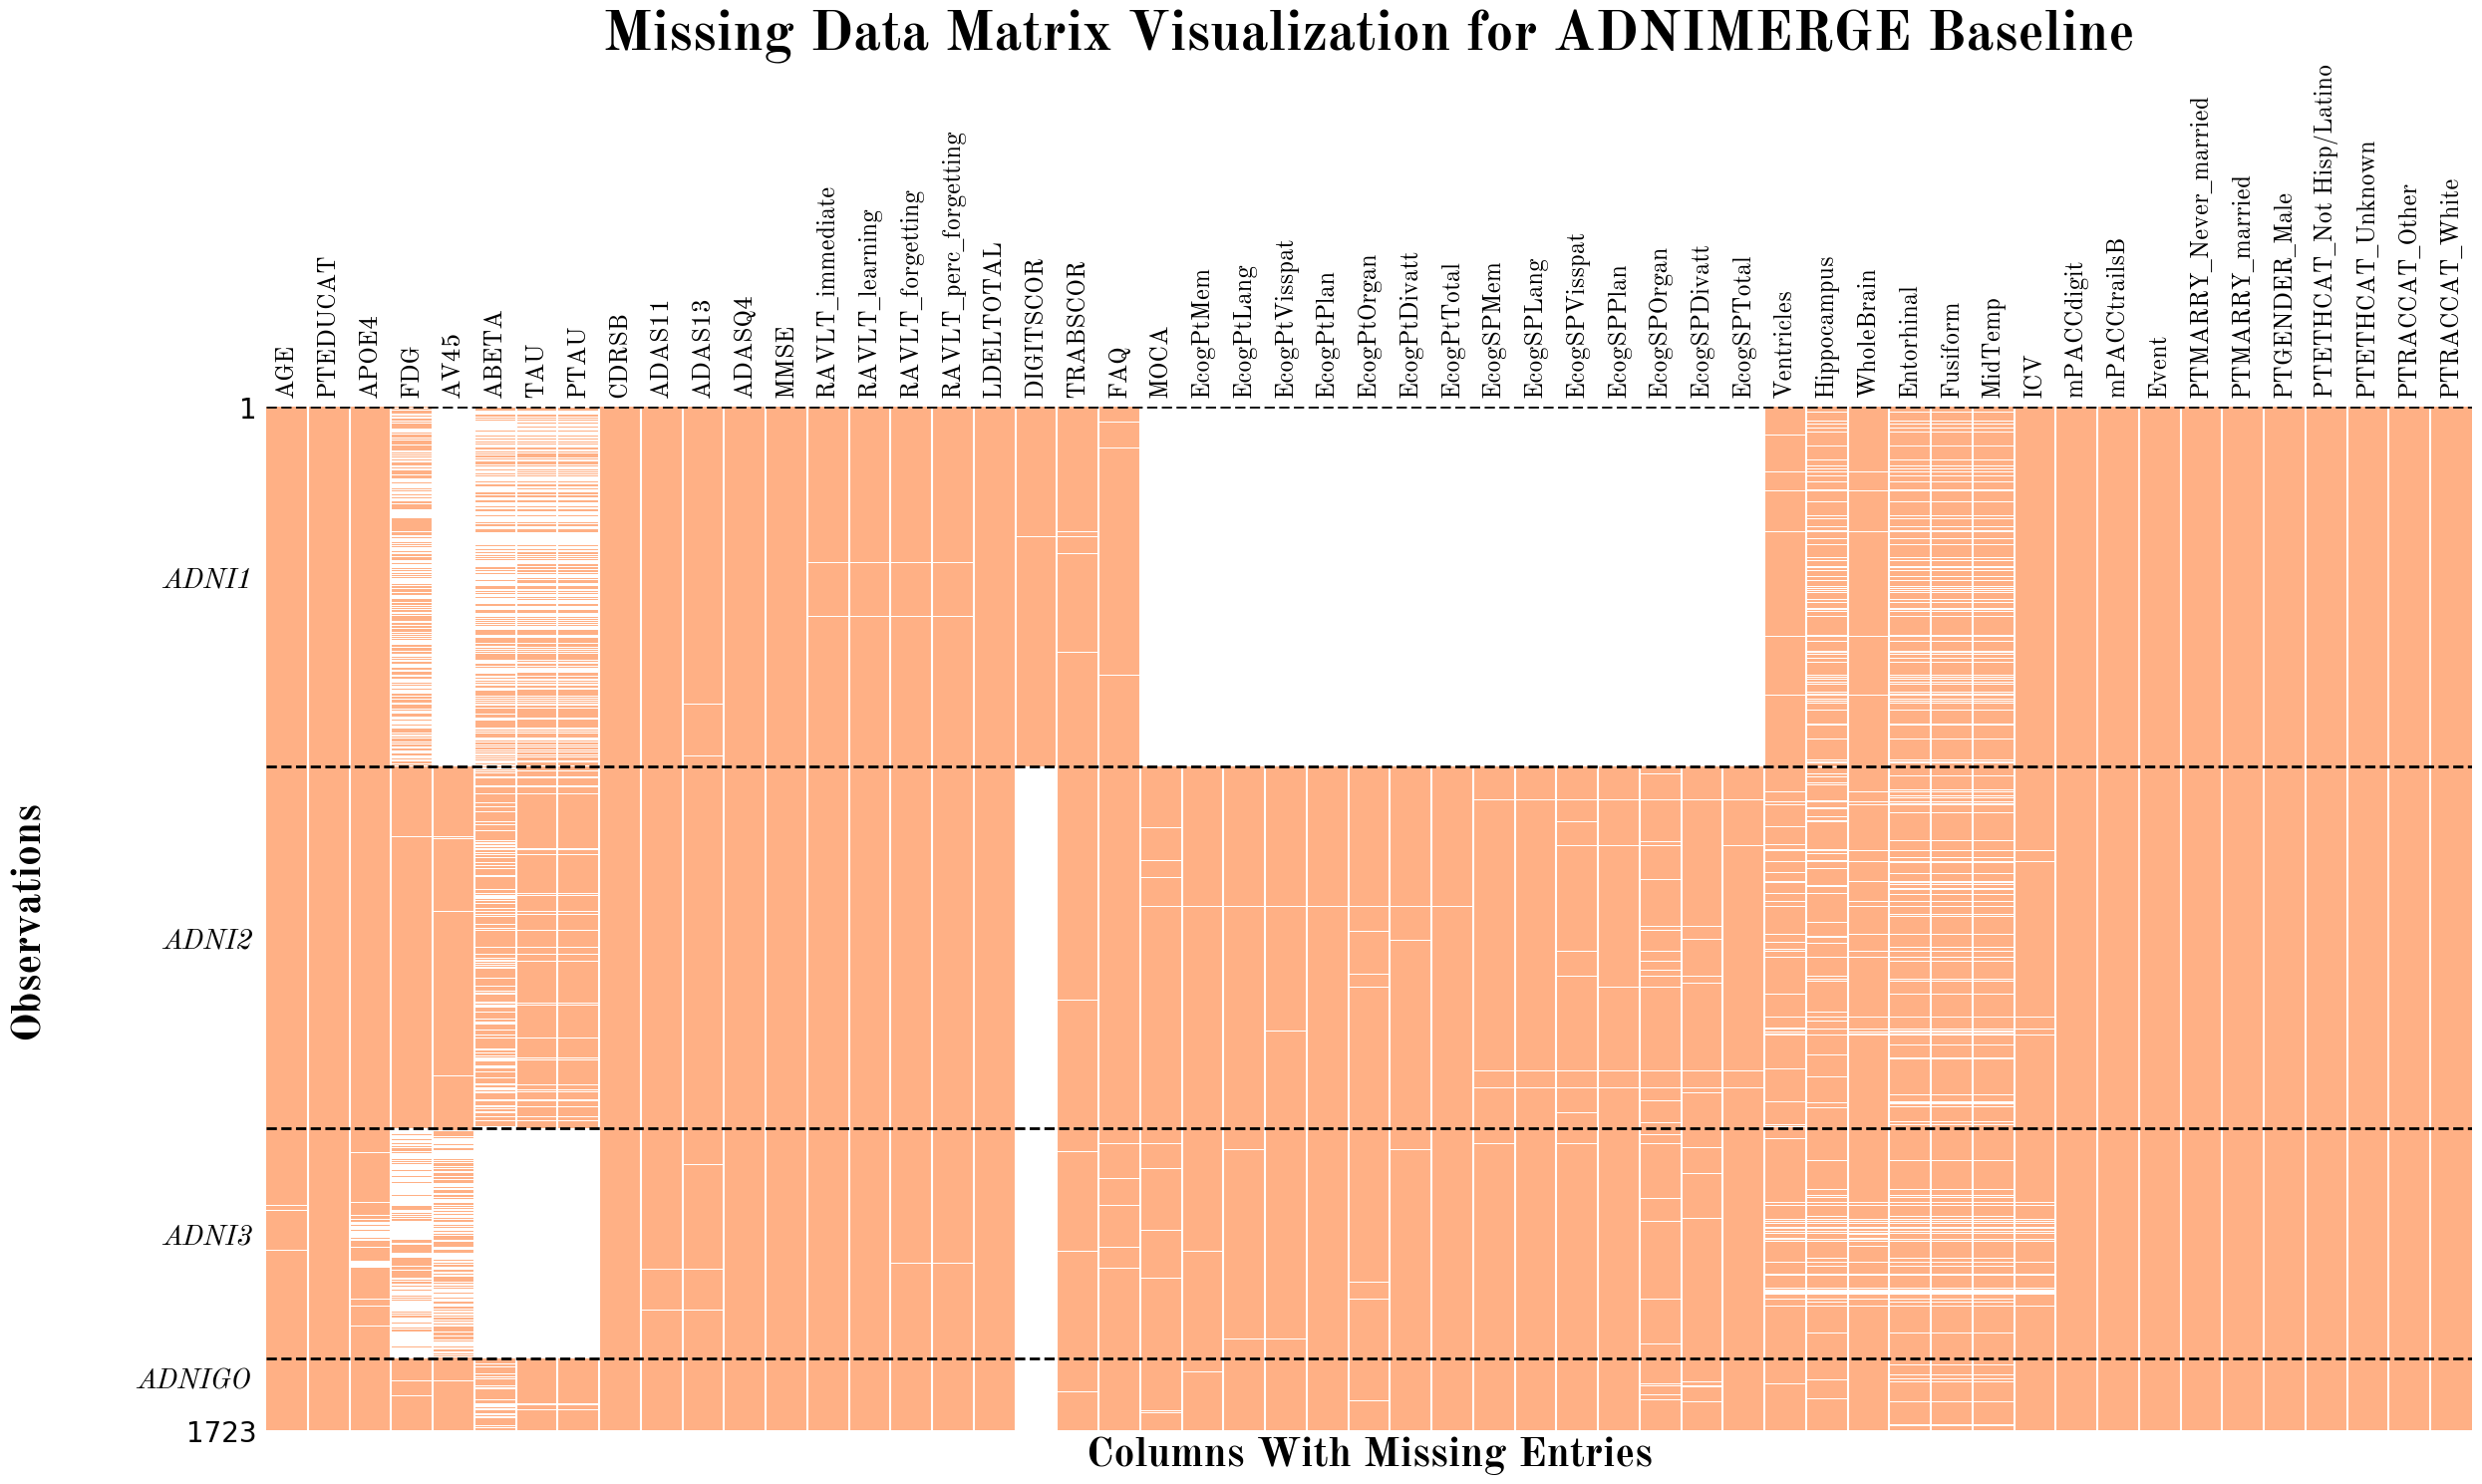

In [23]:
def hex_to_rbg(hex_color):
    h = hex_color.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

import missingno as msno

df_baseline = df_base.sort_values(["COLPROT"])
df_baseline.drop(['FSVERSION_Cross-Sectional FreeSurfer (FreeSurfer Version 4.3)', 
                  'FSVERSION_Cross-Sectional FreeSurfer (6.0)', 
                  'FLDSTRENG_3 Tesla MRI', 'RID', 'M', 'SITE', 'DX', 'ORIGPROT_ADNI2',
                  'ORIGPROT_ADNI3', 'ORIGPROT_ADNIGO'], axis=1, inplace=True)
previous_cohort = None
annot_positions = [0]
for idx, (i, row) in enumerate(df_baseline.iterrows()):
    current_cohort = row['COLPROT']
    if current_cohort != previous_cohort:
        if previous_cohort is not None:
            annot_positions.append(idx)
        previous_cohort = current_cohort

#xddddd
y_placements = [annot_positions[1] - annot_positions[0], annot_positions[2] - annot_positions[1], annot_positions[3] - annot_positions[2], len(df) - annot_positions[3]]

msno.matrix(df_baseline.drop('COLPROT', axis=1), sparkline=False, color=hex_to_rbg(my_colors[1]), labels=True, figsize=(25, 15))
plt.title('Missing Data Matrix Visualization for ADNIMERGE Baseline', fontproperties=prop_bold, fontsize=40)
plt.xlabel('Columns With Missing Entries', fontproperties=prop_bold, fontsize=30)
plt.ylabel('Observations', fontproperties=prop_bold, fontsize=30, labelpad=100)
plt.xticks(rotation=90, fontproperties=prop_regular, fontsize=18, horizontalalignment='center')
plt.yticks([], minor=True)#fontproperties=prop_regular, fontsize=18)

# Add annotations in the plot at calculated positions
for position, y_placement in zip(annot_positions, y_placements):
    colprot = df_baseline['COLPROT'].iloc[position]
    plt.axhline(y=position, color='black', linestyle='--', linewidth=2)  # Draw a line at the change of cohorts
    if(colprot == 'ADNIGO'):
        plt.text(x=-3.6, y=position+50, s=colprot, fontproperties=prop_italic, fontsize=20, color='black')
    else:
        plt.text(x=-3, y=position+y_placement/2, s=colprot, fontproperties=prop_italic, fontsize=20, color='black')
plt.tight_layout()
plt.savefig("figures/missing_data_matrix_adni_baseline.png")
plt.show()

In [ ]:
all_missing_age = df.groupby('RID')['AGE'].apply(lambda x: x.isnull().all())
RIDs_all_missing_age = all_missing_age[all_missing_age].index
print(RIDs_all_missing_age)

all_missing_apoe = df.groupby('RID')['APOE4'].apply(lambda x: x.isnull().all())
RIDs_all_missing_apoe = all_missing_apoe[all_missing_apoe].index
print(len(RIDs_all_missing_apoe))

Index([6505, 6598, 6832, 6861], dtype='int64', name='RID')
217


In [ ]:
df['PTETHCAT']


0        Not Hisp/Latino
1        Not Hisp/Latino
2        Not Hisp/Latino
3        Not Hisp/Latino
4        Not Hisp/Latino
              ...       
16416    Not Hisp/Latino
16417    Not Hisp/Latino
16418    Not Hisp/Latino
16419    Not Hisp/Latino
16420    Not Hisp/Latino
Name: PTETHCAT, Length: 16421, dtype: object

In [36]:
test = get_merge(prepare_sa=True, cutoff=0.6)
test

c:\Users\dbior\OneDrive - Aarhus Universitet\Dokumenter\1. Uni\10. Semester\Master-project\Code\Cluster\EDA\..\Utils\Get_adni.py:93: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datapath)
2024-06-03 17:22:08.779 | INFO     | Utils.Get_adni:get_merge:145 - Missing value feature cutoff: 60.0 %
2024-06-03 17:22:08.781 | INFO     | Utils.Get_adni:get_merge:146 - Removing columns with cutoff: Index(['PIB', 'FBB', 'DIGITSCOR'], dtype='object')
2024-06-03 17:22:08.785 | INFO     | Utils.Get_adni:get_merge:166 - Categorical columns: Index(['COLPROT', 'ORIGPROT', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'FLDSTRENG',
       'FSVERSION'],
      dtype='object')
2024-06-03 17:22:08.802 | INFO     | Utils.Get_adni:get_merge:180 - Data shape = (1697, 63)


,SITE,AGE,PTEDUCAT,APOE4,FDG,AV45,ABETA,TAU,PTAU,CDRSB,...,ORIGPROT_ADNI3,ORIGPROT_ADNIGO,PTGENDER_Male,PTETHCAT_Not Hisp/Latino,PTETHCAT_Unknown,PTRACCAT_Other,PTRACCAT_White,FLDSTRENG_3 Tesla MRI,FSVERSION_Cross-Sectional FreeSurfer (6.0),FSVERSION_Cross-Sectional FreeSurfer (FreeSurfer Version 4.3)
0,11.0,74.3,16.0,0.0,1.33615,NaN,NaN,NaN,NaN,0.0,...,False,False,True,True,False,False,True,False,False,True
1,22.0,67.5,10.0,0.0,NaN,NaN,1501.0,153.1,13.29,1.0,...,False,False,True,False,False,False,True,False,False,True
2,11.0,73.7,16.0,0.0,1.25956,NaN,547.3,337.0,33.43,0.0,...,False,False,True,True,False,False,True,False,False,True
3,100.0,80.4,13.0,0.0,NaN,NaN,NaN,NaN,NaN,0.5,...,False,False,False,True,False,False,True,False,False,True
4,11.0,84.5,18.0,0.0,1.20965,NaN,NaN,440.2,37.51,0.0,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,126.0,76.5,15.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,True,False,True,True,False,False,True,False,False,False
1693,35.0,77.4,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.5,...,True,False,True,True,False,False,True,False,False,False
1694,33.0,86.7,18.0,NaN,NaN,NaN,NaN,NaN,NaN,0.5,...,True,False,False,True,False,False,False,False,True,False
1695,126.0,75.1,17.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,True,False,True,True,False,False,True,False,True,False


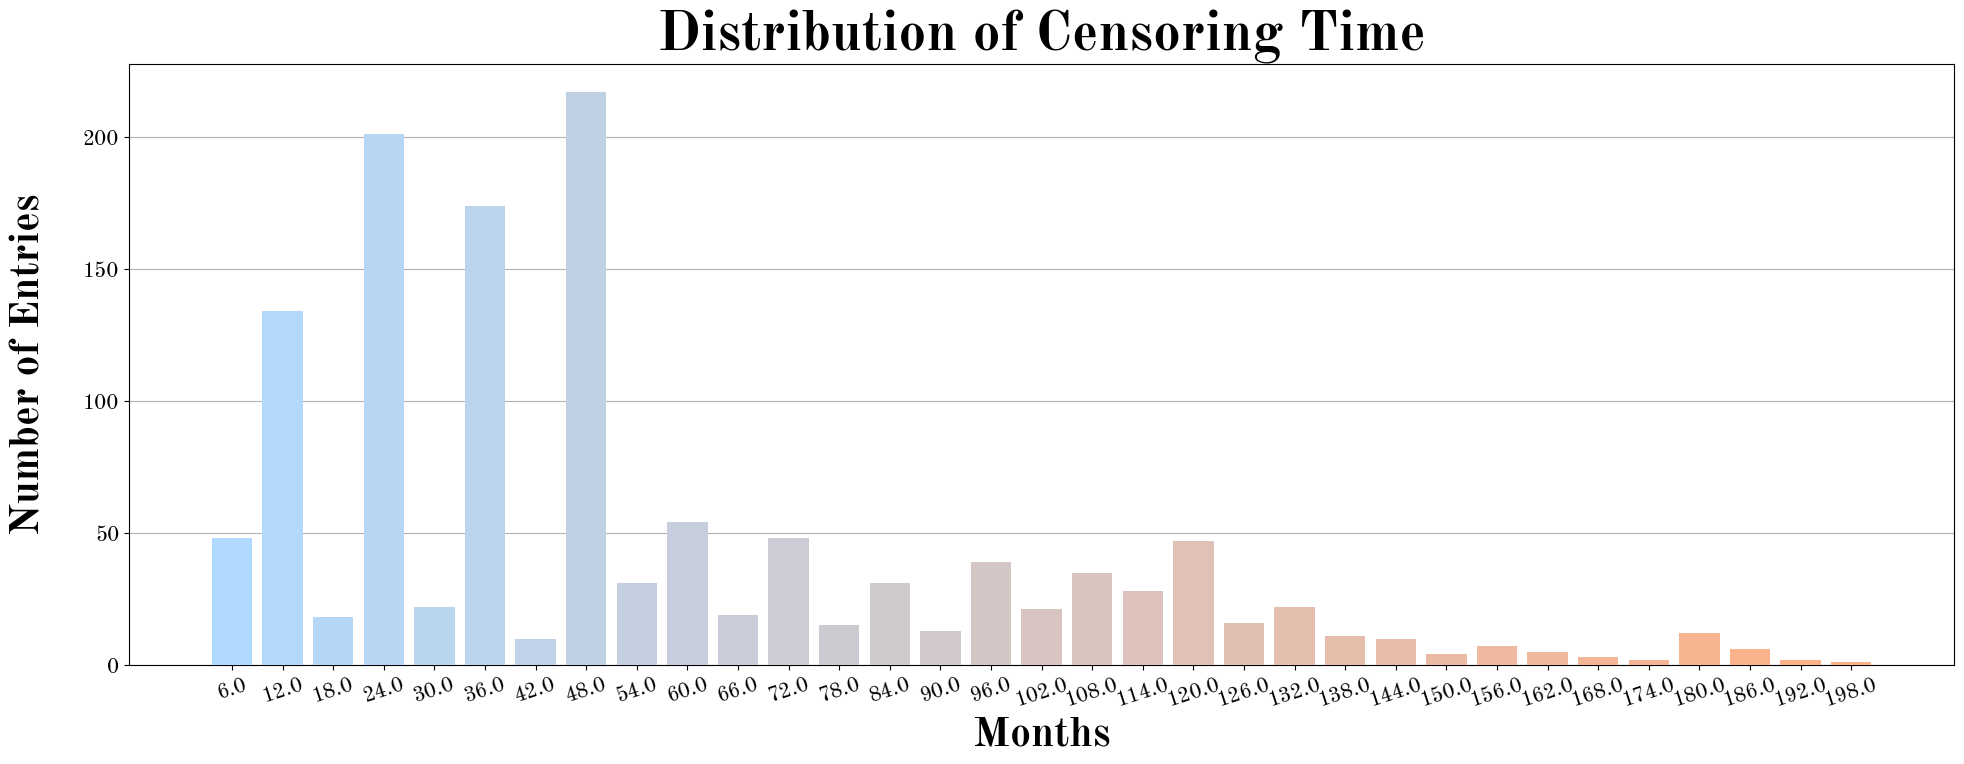

In [77]:
censoring_times = test[test['Event'] == 0]['M'].value_counts().sort_index()
event_times = test[test['Event'] == 1]['M'].value_counts().sort_index()


all_labels = sorted(set(censoring_times.index).union(set(event_times.index)))

plt.figure(figsize=figure_size)

plt.bar(range(len(censoring_times.index)), censoring_times.values, color=get_color_gradient(my_colors[0], my_colors[1], len(all_labels)), zorder=3)
plt.title('Distribution of Censoring Time', fontproperties=prop_bold, fontsize=40)
plt.xlabel('Months', fontsize=30, fontproperties=prop_bold)
plt.ylabel('Number of Entries', fontsize=30, fontproperties=prop_bold, labelpad=25)
plt.xticks(range(len(all_labels)), all_labels, rotation=18, fontproperties=prop_regular, fontsize=15)
plt.yticks(fontproperties=prop_regular, fontsize=15)
plt.grid(axis='y')
plt.tight_layout(pad=2)
plt.savefig('figures/censoring_time.pdf')
plt.show()


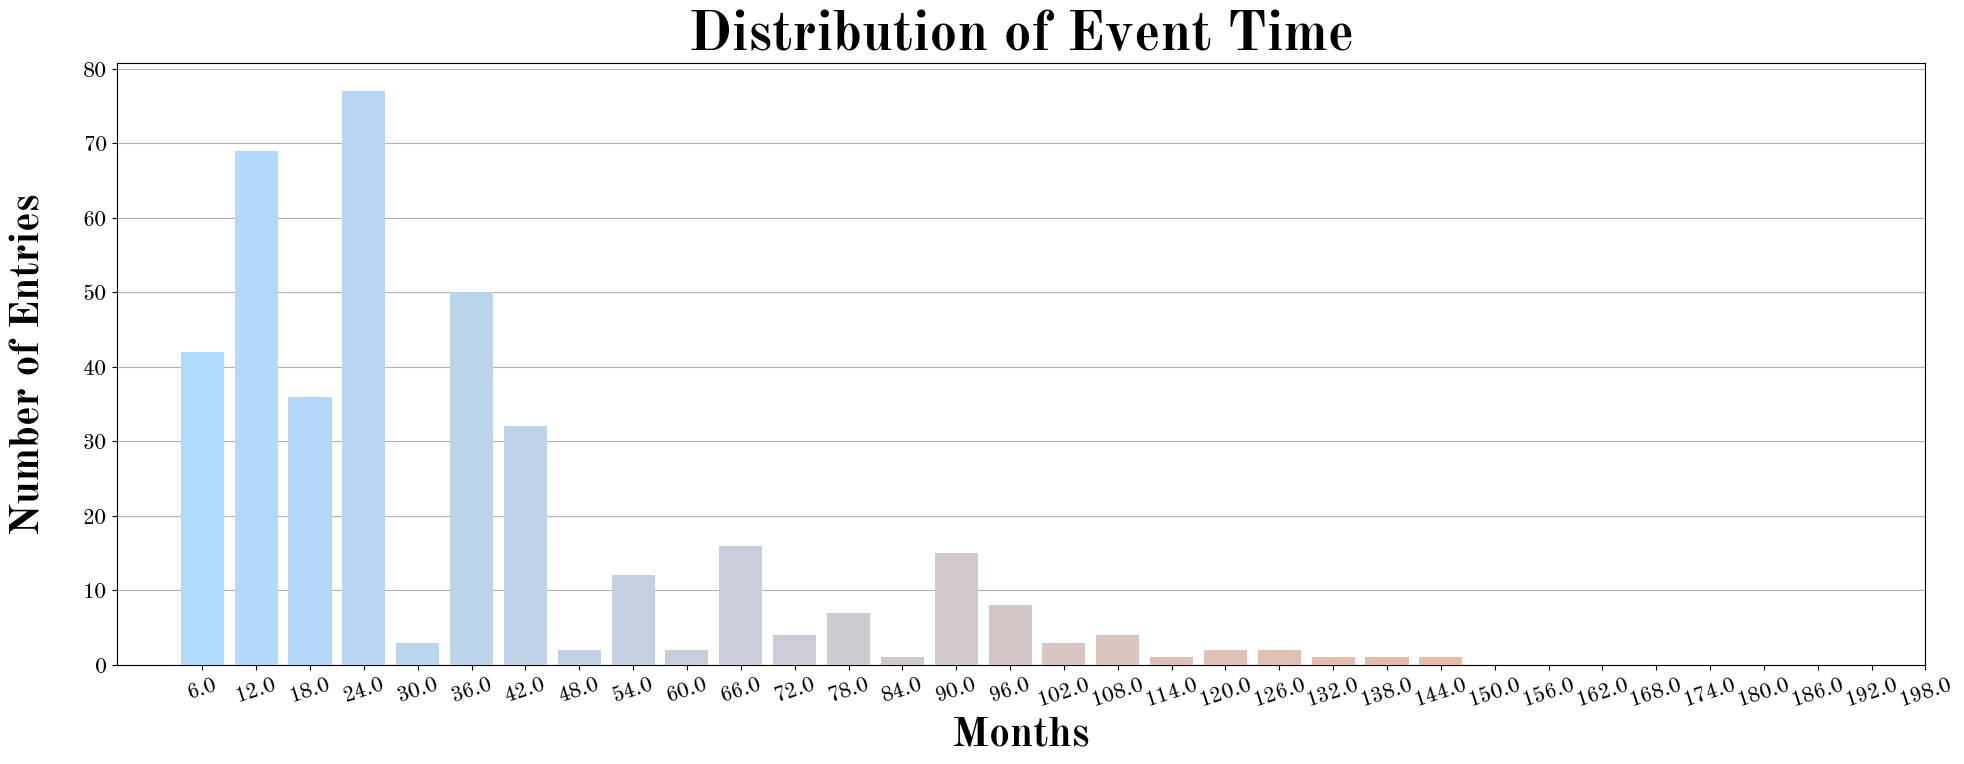

In [76]:
plt.figure(figsize=figure_size)

plt.bar(range(len(event_times.index)), event_times.values, color=get_color_gradient(my_colors[0], my_colors[1], len(all_labels)), zorder=3)
plt.title('Distribution of Event Time', fontproperties=prop_bold, fontsize=40)
plt.xlabel('Months', fontsize=30, fontproperties=prop_bold)
plt.ylabel('Number of Entries', fontsize=30, fontproperties=prop_bold, labelpad=25)
plt.xticks(range(len(all_labels)), all_labels, rotation=18, fontproperties=prop_regular, fontsize=15)
plt.yticks(fontproperties=prop_regular, fontsize=15)
plt.grid(axis='y')
plt.tight_layout(pad=2)
plt.savefig('figures/event_time.pdf')
plt.show()

In [47]:
df = pd.read_csv('../Datasets/ADNI/ADNIMERGE_02Apr2024.csv')
baseline_columns = ['CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'ADASQ4_bl', 'MMSE_bl', 'RAVLT_immediate_bl', 
                    'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'LDELTOTAL_BL',
                    'DIGITSCOR_bl', 'TRABSCOR_bl', 'FAQ_bl', 'mPACCdigit_bl',
                    'mPACCtrailsB_bl', 'Ventricles_bl', 'Hippocampus_bl', 
                    'WholeBrain_bl', 'Entorhinal_bl', 'Fusiform_bl', 'MidTemp_bl', 'ICV_bl',
                    'MOCA_bl', 'EcogPtMem_bl', 'EcogPtLang_bl', 'EcogPtVisspat_bl',
                    'EcogPtPlan_bl', 'EcogPtOrgan_bl', 'EcogPtDivatt_bl', 'EcogPtTotal_bl',
                    'EcogSPMem_bl', 'EcogSPLang_bl', 'EcogSPVisspat_bl', 'EcogSPPlan_bl',
                    'EcogSPOrgan_bl', 'EcogSPDivatt_bl', 'EcogSPTotal_bl', 'FDG_bl', 'PIB_bl','AV45_bl', 'FBB_bl',
                    'EXAMDATE_bl', 'FLDSTRENG_bl', 'FSVERSION_bl', 'IMAGEUID_bl', 'ABETA_bl', 'TAU_bl', 'PTAU_bl', 
                    'DX_bl']
print(len(baseline_columns))
df = df.drop(columns=baseline_columns, axis=1)
df['DX'] = df['DX'].replace({'Dementia': 'AD'})
df = df[df['DX'].isna()]

49


C:\Users\dbior\AppData\Local\Temp\ipykernel_30484\97259222.py:1: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Datasets/ADNI/ADNIMERGE_02Apr2024.csv')


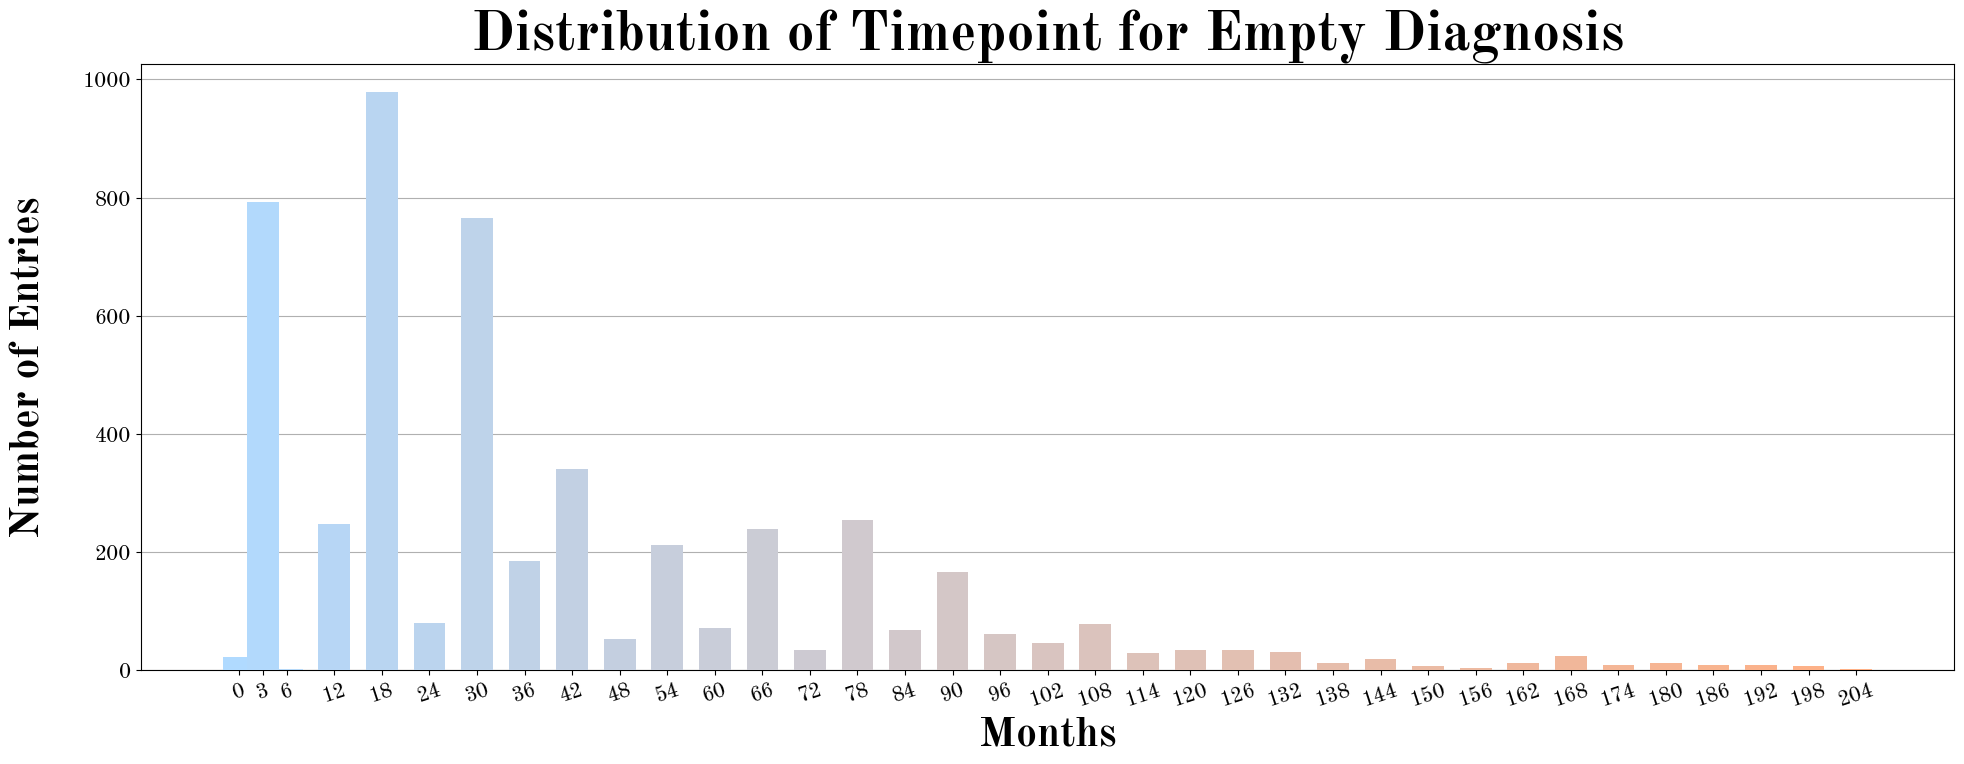

In [75]:
timepoints = df['M'].value_counts().sort_index()

plt.figure(figsize=figure_size)
range(len(timepoints.index))
plt.bar(timepoints.index, timepoints.values, color=get_color_gradient(my_colors[0], my_colors[1], len(timepoints.index)), zorder=3,  width=4)
plt.title('Distribution of Timepoint for Empty Diagnosis', fontproperties=prop_bold, fontsize=40)
plt.xlabel('Months', fontsize=30, fontproperties=prop_bold)
plt.ylabel('Number of Entries', fontsize=30, fontproperties=prop_bold, labelpad=25)
plt.xticks(timepoints.index,rotation=18, fontproperties=prop_regular, fontsize=15)
plt.yticks(fontproperties=prop_regular, fontsize=15)
plt.grid(axis='y')
plt.tight_layout(pad=2)
plt.savefig('figures/missing_dx_time_distribution.pdf')
plt.show()

# Drop entries:
- COLPROT: Protocol number of measurement
- ORIGPROT: Original study protoc
- PTID?: Original study protocol
- SITE?: Site of study (i guess?)
- EXAMDATE: Date of measurement
- FLDSTRENG: MRI Field Strength
- FSVERSION: FreeSurfer Software Version
- IMAGEUID: LONI image ID
- EXAMDATE_bl: Exam date os baseline measure
- FLDSTRENG_bl: MRI Field Strength at baseline?
- FSVERSION_bl: reeSurfer Software Version at baseline?
- IMAGEUID_bl: LONI image ID at baseline?
- ABETA_bl?: CSF ABETA at baseline


# Understand entries
- Ventricles: UCSF Ventricles
- UCSF: all entries with it.
- FDG: FDG-PET metaROI

# Introduce in theory of AD
- CDR-SB
- ADAS cognitive scores (ADAS11, ADAS13, ADASQ4)
- MMSE score
- CSR score
- RAVLT (RAVLT.immediate, RAVLT.learning, RAVLT.forgetting, RAVLT.perc.forgetting)
- LDELTOTAL(?)
- FAQ
- MOCA
- DIGITSCOR
- EcogPt